In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
import os

#### NOTE!
##### cell 1 to cell 23 are test cells.
##### cell 24 is the actual processing.
##### If you want to get the correct results run from cell 24 till the end.

In [4]:
df_adni_merge = pd.read_csv("../data/clinical/ADNIMERGE_10Nov2025.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_14288\491907170.py:1: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adni_merge = pd.read_csv("../data/clinical/ADNIMERGE_10Nov2025.csv")


In [52]:
df = pd.read_csv("../data/preprocessed-data/Adni_final.csv")
df.shape

(16421, 118)

In [5]:
df_adni_merge.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2023-07-07 04:59:40.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2023-07-07 04:59:40.0


Dataset shape: (16421, 116)

Column names: ['RID', 'COLPROT', 'ORIGPROT', 'PTID', 'SITE', 'VISCODE', 'EXAMDATE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'FBB', 'ABETA', 'TAU', 'PTAU', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'FLDSTRENG', 'FSVERSION', 'IMAGEUID', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX', 'mPACCdigit', 'mPACCtrailsB', 'EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'ADASQ4_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL', 'DIGITSCOR_b

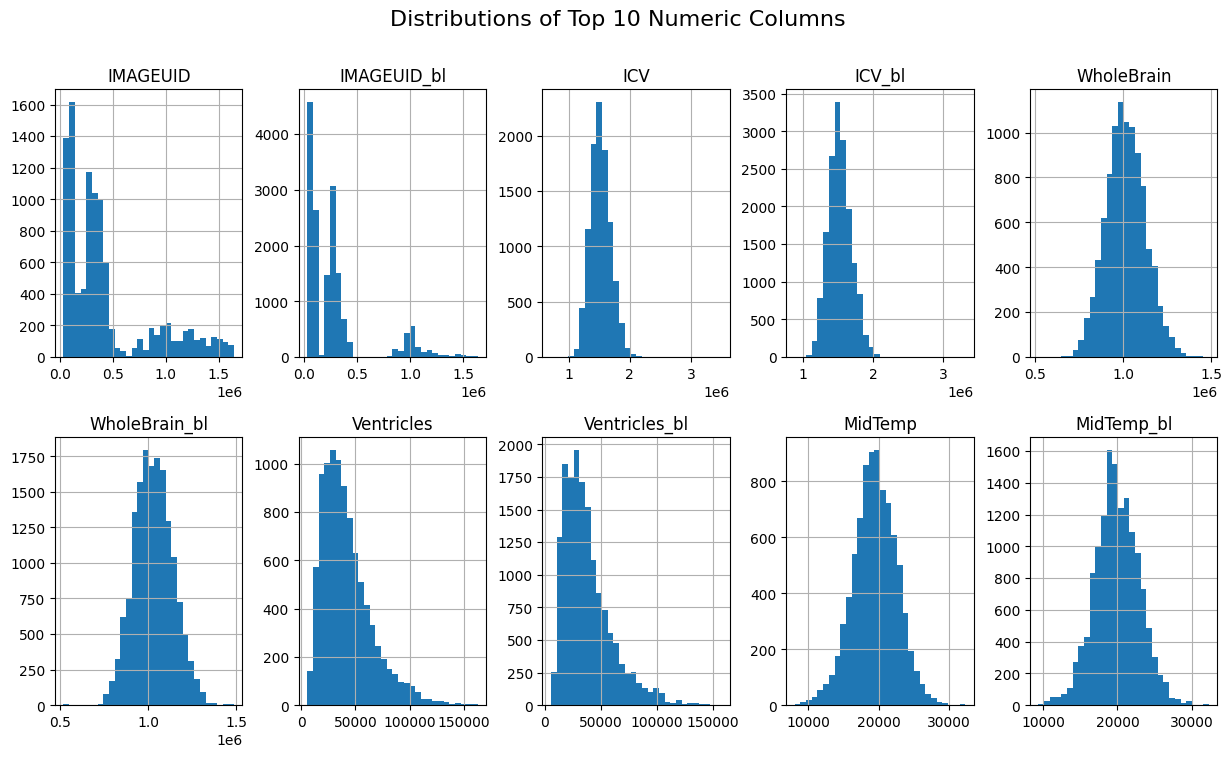

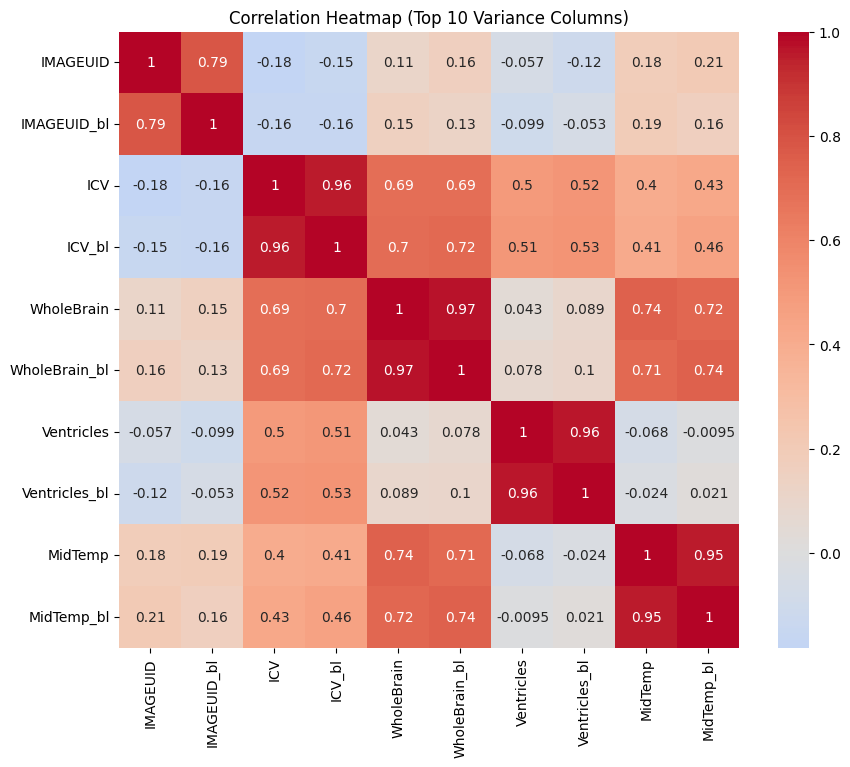

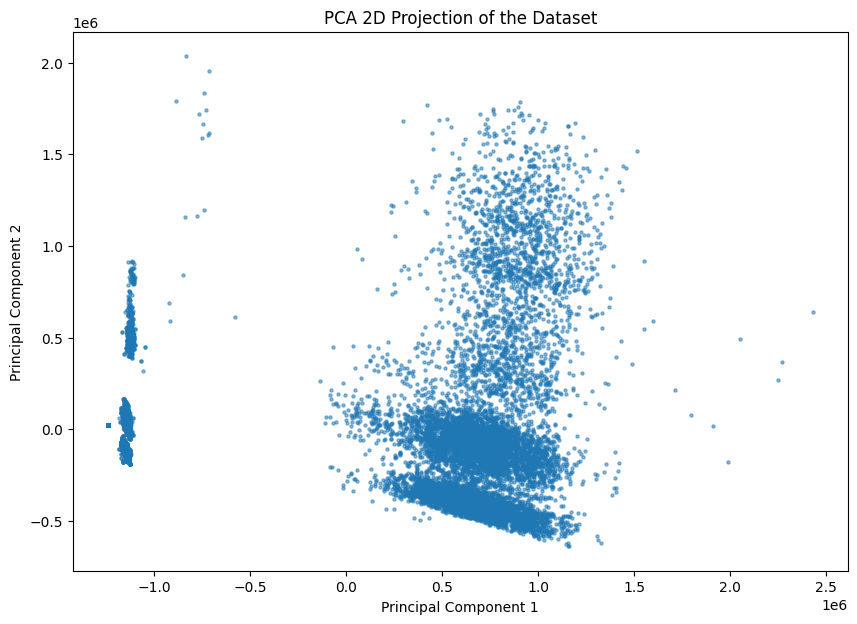

Explained variance ratio (2 PCs): [0.72402563 0.13697633]


In [6]:


# -------------------------
# 1. Basic info
# -------------------------
print("Dataset shape:", df_adni_merge.shape)
print("\nColumn names:", df_adni_merge.columns.tolist())
print("\nInfo:")
print(df_adni_merge.info)
print("\nSummary statistics:")
print(df_adni_merge.describe())

# -------------------------
# 2. Select numeric columns
# -------------------------
numeric_cols = df_adni_merge.select_dtypes(include='number').columns
print("\nNumber of numeric columns:", len(numeric_cols))

# -------------------------
# 3. Top 10 columns by variance for plotting distributions
# -------------------------
top_var_cols = df_adni_merge[numeric_cols].var().sort_values(ascending=False).head(10).index
print("\nTop 10 numeric columns by variance:", top_var_cols.tolist())

df_adni_merge[top_var_cols].hist(bins=30, figsize=(15,8), layout=(2,5))
plt.suptitle("Distributions of Top 10 Numeric Columns", fontsize=16)
plt.show()

# -------------------------
# 4. Correlation heatmap (top 10)
# -------------------------
corr_matrix = df_adni_merge[top_var_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Top 10 Variance Columns)")
plt.show()

# -------------------------
# 5. PCA for 2D visualization
# -------------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_adni_merge[numeric_cols].fillna(0))  # fill NaN with 0

plt.figure(figsize=(10,7))
plt.scatter(pca_result[:,0], pca_result[:,1], s=5, alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Projection of the Dataset")
plt.show()

print("Explained variance ratio (2 PCs):", pca.explained_variance_ratio_)


In [7]:
categorical_cols = df_adni_merge.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols.tolist())

Categorical columns: ['COLPROT', 'ORIGPROT', 'PTID', 'VISCODE', 'EXAMDATE', 'DX_bl', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'ABETA', 'TAU', 'PTAU', 'FLDSTRENG', 'FSVERSION', 'DX', 'EXAMDATE_bl', 'FLDSTRENG_bl', 'FSVERSION_bl', 'ABETA_bl', 'TAU_bl', 'PTAU_bl', 'update_stamp']


In [8]:
df_adni_merge[categorical_cols].head()

,COLPROT,ORIGPROT,PTID,VISCODE,EXAMDATE,DX_bl,PTGENDER,PTETHCAT,PTRACCAT,PTMARRY,...,FLDSTRENG,FSVERSION,DX,EXAMDATE_bl,FLDSTRENG_bl,FSVERSION_bl,ABETA_bl,TAU_bl,PTAU_bl,update_stamp
0,ADNI1,ADNI1,011_S_0002,bl,2005-09-08,CN,Male,Not Hisp/Latino,White,Married,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,CN,2005-09-08,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,NaN,NaN,NaN,2023-07-07 04:59:40.0
1,ADNI1,ADNI1,011_S_0003,bl,2005-09-12,AD,Male,Not Hisp/Latino,White,Married,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,Dementia,2005-09-12,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,741.5,239.7,22.83,2023-07-07 04:59:40.0
2,ADNI1,ADNI1,011_S_0003,m06,2006-03-13,AD,Male,Not Hisp/Latino,White,Married,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,Dementia,2005-09-12,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,741.5,239.7,22.83,2023-07-07 04:59:40.0
3,ADNI1,ADNI1,011_S_0003,m12,2006-09-12,AD,Male,Not Hisp/Latino,White,Married,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,Dementia,2005-09-12,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,741.5,239.7,22.83,2023-07-07 04:59:40.0
4,ADNI1,ADNI1,011_S_0003,m24,2007-09-12,AD,Male,Not Hisp/Latino,White,Married,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,Dementia,2005-09-12,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,741.5,239.7,22.83,2023-07-07 04:59:40.0


In [9]:
# Assume categorical_cols is already defined
# e.g., categorical_cols = df.select_dtypes(include='object').columns.tolist()

unique_values = {col: df_adni_merge[col].unique().tolist() for col in categorical_cols}

# Print unique values for each categorical column
for col, values in unique_values.items():
    print(f"{col} ({len(values)} unique values): {values}\n")


COLPROT (4 unique values): ['ADNI1', 'ADNI2', 'ADNIGO', 'ADNI3']

ORIGPROT (4 unique values): ['ADNI1', 'ADNI2', 'ADNIGO', 'ADNI3']

PTID (2430 unique values): ['011_S_0002', '011_S_0003', '022_S_0004', '011_S_0005', '100_S_0006', '022_S_0007', '011_S_0010', '022_S_0014', '100_S_0015', '011_S_0016', '011_S_0021', '011_S_0023', '082_S_5282', '100_S_5280', '067_S_0029', '035_S_0033', '100_S_0035', '067_S_0038', '099_S_0040', '007_S_0041', '023_S_0042', '082_S_5279', '018_S_0043', '022_S_0044', '067_S_0045', '100_S_0047', '123_S_0050', '099_S_0051', '011_S_0053', '099_S_0054', '018_S_0055', '067_S_0056', '082_S_5278', '018_S_0057', '023_S_0058', '067_S_0059', '099_S_0060', '023_S_0061', '027_S_5277', '022_S_0066', '010_S_0067', '007_S_0068', '100_S_0069', '007_S_0070', '123_S_0072', '135_S_5275', '027_S_0074', '067_S_0076', '067_S_0077', '023_S_0078', '018_S_0080', '023_S_0081', '023_S_0083', '023_S_0084', '136_S_0086', '018_S_0087', '123_S_0088', '073_S_0089', '135_S_5273', '099_S_0090',

In [10]:
categorical_cols = ['DX_bl','PTGENDER','PTETHCAT','PTRACCAT','PTMARRY','DX']

for col in categorical_cols:
    df_adni_merge[col] = df_adni_merge[col].fillna(df_adni_merge[col].mode()[0])


In [11]:
from sklearn.preprocessing import LabelEncoder

# Label Encode binary or ordinal categories
label_encode_cols = ['PTGENDER','DX_bl','DX','PTMARRY']  # Label encode these

le_dict = {}  # store encoders for later decoding
for col in label_encode_cols:
    le = LabelEncoder()
    df_adni_merge[col] = le.fit_transform(df_adni_merge[col])
    le_dict[col] = le  # save encoder


In [12]:
# One-Hot Encode nominal categories
df_adni_merge = pd.get_dummies(df_adni_merge, columns=['PTETHCAT','PTRACCAT'], drop_first=True)


In [13]:
print(df_adni_merge.head())
print(df_adni_merge.tail())

   RID COLPROT ORIGPROT        PTID  SITE VISCODE    EXAMDATE  DX_bl   AGE  \
0    2   ADNI1    ADNI1  011_S_0002    11      bl  2005-09-08      1  74.3   
1    3   ADNI1    ADNI1  011_S_0003    11      bl  2005-09-12      0  81.3   
2    3   ADNI1    ADNI1  011_S_0003    11     m06  2006-03-13      0  81.3   
3    3   ADNI1    ADNI1  011_S_0003    11     m12  2006-09-12      0  81.3   
4    3   ADNI1    ADNI1  011_S_0003    11     m24  2007-09-12      0  81.3   

   PTGENDER  ...   M           update_stamp  PTETHCAT_Not Hisp/Latino  \
0         1  ...   0  2023-07-07 04:59:40.0                      True   
1         1  ...   0  2023-07-07 04:59:40.0                      True   
2         1  ...   6  2023-07-07 04:59:40.0                      True   
3         1  ...  12  2023-07-07 04:59:40.0                      True   
4         1  ...  24  2023-07-07 04:59:40.0                      True   

   PTETHCAT_Unknown  PTRACCAT_Asian  PTRACCAT_Black  \
0             False           False  

In [14]:
df_adni_merge.shape

(16421, 122)

In [15]:
numeric_from_cat = ['ABETA','TAU','PTAU','ABETA_bl','TAU_bl','PTAU_bl']

for col in numeric_from_cat:
    df_adni_merge[col] = pd.to_numeric(df_adni_merge[col], errors='coerce')  # non-numeric → NaN

# Check how many NaNs were created
print(df_adni_merge[numeric_from_cat].isna().sum())


ABETA       14403
TAU         14060
PTAU        14064
ABETA_bl     8239
TAU_bl       6356
PTAU_bl      6367
dtype: int64


In [16]:
df_adni_merge[numeric_from_cat] = df_adni_merge[numeric_from_cat].fillna(df_adni_merge[numeric_from_cat].mean())


In [17]:
print(df_adni_merge[numeric_from_cat].isna().sum())

ABETA       0
TAU         0
PTAU        0
ABETA_bl    0
TAU_bl      0
PTAU_bl     0
dtype: int64


In [18]:
df_adni_merge.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,M,update_stamp,PTETHCAT_Not Hisp/Latino,PTETHCAT_Unknown,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian/Other PI,PTRACCAT_More than one,PTRACCAT_Unknown,PTRACCAT_White
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,1,74.3,1,...,0,2023-07-07 04:59:40.0,True,False,False,False,False,False,False,True
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,0,81.3,1,...,0,2023-07-07 04:59:40.0,True,False,False,False,False,False,False,True
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,0,81.3,1,...,6,2023-07-07 04:59:40.0,True,False,False,False,False,False,False,True
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,0,81.3,1,...,12,2023-07-07 04:59:40.0,True,False,False,False,False,False,False,True
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,0,81.3,1,...,24,2023-07-07 04:59:40.0,True,False,False,False,False,False,False,True


In [19]:
print("Columns in DataFrame:", df_adni_merge.columns.tolist())


Columns in DataFrame: ['RID', 'COLPROT', 'ORIGPROT', 'PTID', 'SITE', 'VISCODE', 'EXAMDATE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'FBB', 'ABETA', 'TAU', 'PTAU', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'FLDSTRENG', 'FSVERSION', 'IMAGEUID', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX', 'mPACCdigit', 'mPACCtrailsB', 'EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'ADASQ4_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL', 'DIGITSCOR_bl', 'TRABSCOR_bl', 'FAQ_bl', 'mPACCdigit_bl',

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# VISCODE → Numeric months conversion

if 'VISCODE' in df_adni_merge.columns:
    def viscode_to_month(v):
        """Convert ADNI VISCODE values like 'bl', 'm12', 'm24' to numeric months."""
        if isinstance(v, str):
            v = v.strip().lower()
            if v == 'bl':
                return 0
            elif v.startswith('m'):
                try:
                    return int(v.replace('m', ''))
                except ValueError:
                    return np.nan
        return np.nan

    df_adni_merge['VISCODE_num'] = df_adni_merge['VISCODE'].apply(viscode_to_month)
    print("✅ Added numeric VISCODE column (VISCODE_num). Example values:")
    print(df_adni_merge[['VISCODE', 'VISCODE_num']].head())
else:
    print("⚠️ VISCODE column not found — skipping conversion.")



# Columns to drop / keep for merging

cols_to_drop = ['RID', 'VISCODE', 'PTID', 'SITE', 'IMAGEUID', 'IMAGEUID_bl', 'Month', 'M']
cols_to_merge_on = ['RID', 'VISCODE', 'PTID']

# Save columns used for merging (if they exist)
existing_cols_to_save = [col for col in cols_to_merge_on if col in df_adni_merge.columns]
df_adni_merge_save_cols = df_adni_merge[existing_cols_to_save].copy()

# Drop unnecessary columns safely
existing_cols_to_drop = [col for col in cols_to_drop if col in df_adni_merge.columns]
df_adni_merge = df_adni_merge.drop(columns=existing_cols_to_drop)

print(f"🗑️ Dropped columns: {existing_cols_to_drop}")
print(f"📏 New shape: {df_adni_merge.shape}")



# Convert numeric-like categorical columns to float

numeric_from_cat = ['ABETA', 'TAU', 'PTAU', 'ABETA_bl', 'TAU_bl', 'PTAU_bl']
for col in numeric_from_cat:
    if col in df_adni_merge.columns:
        df_adni_merge[col] = pd.to_numeric(df_adni_merge[col], errors='coerce')



# Fill missing values

# Numeric columns
numeric_cols = df_adni_merge.select_dtypes(include='number').columns.tolist()
df_adni_merge[numeric_cols] = df_adni_merge[numeric_cols].fillna(df_adni_merge[numeric_cols].mean())

# Categorical columns
categorical_cols = df_adni_merge.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    if df_adni_merge[col].mode().empty:
        df_adni_merge[col] = df_adni_merge[col].fillna("Unknown")
    else:
        df_adni_merge[col] = df_adni_merge[col].fillna(df_adni_merge[col].mode()[0])



# Encode categorical columns

# Skip columns already one-hot encoded (contain '_')
one_hot_cols = [col for col in categorical_cols if '_' in col]
label_encode_cols = [col for col in categorical_cols if col not in one_hot_cols]

le_dict = {}
for col in label_encode_cols:
    le = LabelEncoder()
    df_adni_merge[col] = le.fit_transform(df_adni_merge[col])
    le_dict[col] = le



# Summary

print("\n PREPROCESSING SUMMARY:")
print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns encoded with LabelEncoder: {label_encode_cols}")
print(f"One-hot encoded columns detected (skipped): {one_hot_cols}")
print(f"Final DataFrame shape: {df_adni_merge.shape}")
print("Preprocessing complete!")


Dropped columns: ['RID', 'SITE', 'IMAGEUID', 'IMAGEUID_bl', 'Month', 'M']
New shape: (16421, 108)
Numeric columns: ['DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'FBB', 'ABETA', 'TAU', 'PTAU', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX', 'mPACCdigit', 'mPACCtrailsB', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'ADASQ4_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL', 'DIGITSCOR_bl', 'TRABSCOR_bl', 'FAQ_bl', 'mPACCdigit_bl', 'mPACCtrailsB_bl', 'Ventricl

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import os

def save_interactive_adni_dashboard(df, save_dir="outputs/figures/ADNI-MERGE-FIGURES"):
    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    print(f"📁 Saving all figures to: {os.path.abspath(save_dir)}")

    # Separate columns
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    one_hot_cols = [col for col in numeric_cols if set(df[col].unique()) <= {0,1}]
    label_encoded_cols = [col for col in numeric_cols if col not in one_hot_cols]

    # ========== 1️⃣ Summary Table ==========
    summary = df.describe(include='all').T.reset_index()
    summary_fig = go.Figure(data=[go.Table(
        header=dict(values=list(summary.columns),
                    fill_color='paleturquoise', align='left'),
        cells=dict(values=[summary[col] for col in summary.columns],
                   fill_color='lavender', align='left'))
    ])
    summary_fig.update_layout(title_text="ADNI Dataset Summary")
    summary_fig.write_html(os.path.join(save_dir, "summary_table.html"))
    print("Saved: summary_table.html")

    # Numeric Histograms
    for col in numeric_cols:
        fig = px.histogram(df, x=col, nbins=30, marginal="box", title=f"Distribution & Boxplot: {col}")
        fig.write_html(os.path.join(save_dir, f"histogram_{col}.html"))
    print(f"Saved histograms for {len(numeric_cols)} numeric columns")

    #
    for col in label_encoded_cols:
        fig = px.histogram(df, x=col, title=f"Counts of Label-encoded Category: {col}")
        fig.write_html(os.path.join(save_dir, f"label_encoded_{col}.html"))
    print(f"Saved label-encoded plots for {len(label_encoded_cols)} columns")

    # One-Hot Encoded Columns
    if one_hot_cols:
        one_hot_counts = df[one_hot_cols].sum().sort_values(ascending=False)
        fig = px.bar(x=one_hot_counts.index, y=one_hot_counts.values,
                     title="Counts of One-hot Encoded Columns")
        fig.write_html(os.path.join(save_dir, "one_hot_encoded_counts.html"))
        print("Saved: one_hot_encoded_counts.html")

    # Correlation Heatmap
    corr = df[numeric_cols].corr()
    fig = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu_r', origin='lower',
                    title="Correlation Heatmap of Numeric Features")
    fig.write_html(os.path.join(save_dir, "correlation_heatmap.html"))
    print("Saved: correlation_heatmap.html")

    print("\n🎉 All ADNI-MERGE-FIGURES saved successfully!")
save_interactive_adni_dashboard(df_adni_merge)


📁 Saving all figures to: e:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\notebooks\outputs\figures\ADNI-MERGE-FIGURES


✅ Saved: summary_table.html
✅ Saved histograms for 99 numeric columns
✅ Saved label-encoded plots for 97 columns
✅ Saved: one_hot_encoded_counts.html
✅ Saved: correlation_heatmap.html

🎉 All ADNI-MERGE-FIGURES saved successfully!


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

def preprocess_dataset(
    df: pd.DataFrame,
    cols_to_drop=None,
    cols_to_merge_on=None,
    numeric_from_cat=None,
    convert_viscode=True,
    viscode_mapping=None,  # Optional custom VISCODE mapping
    scaling_method="standard",
    save_prefix=None
):
    """
    Generalized preprocessing pipeline for ADNI-related datasets.

    Parameters
    ----------
    df : pd.DataFrame
        Dataset to preprocess.
    cols_to_drop : list[str], optional
        Columns to drop.
    cols_to_merge_on : list[str], optional
        Columns to preserve for merging later.
    numeric_from_cat : list[str], optional
        Columns that are numeric but stored as categorical.
    convert_viscode : bool, default=True
        Convert VISCODE to numeric.
    viscode_mapping : dict, optional
        Custom mapping for VISCODE values. Default: {"sc": -1, "bl": 0, "f": 99, "fu": 99}
    scaling_method : str, default="standard"
        Scaling: "standard", "minmax", or None.
    save_prefix : str, optional
        File prefix to save processed data and merge keys.

    Returns
    -------
    df_processed : pd.DataFrame
    df_merge_keys : pd.DataFrame or None
    le_dict : dict
    scaler : fitted scaler or None
    """

    df = df.copy()


    # VISCODE → Numeric

    if convert_viscode and "VISCODE" in df.columns:
        if viscode_mapping is None:
            viscode_mapping = {"sc": -1, "bl": 0, "f": 99, "fu": 99}

        def viscode_to_num(v):
            if pd.isna(v):
                return np.nan
            v = str(v).strip().lower()
            if v in viscode_mapping:
                return viscode_mapping[v]
            elif v.startswith("m"):
                try:
                    return int(v.replace("m", ""))
                except ValueError:
                    return np.nan
            return np.nan

        df["VISCODE_num"] = df["VISCODE"].apply(viscode_to_num)
        print("VISCODE converted to numeric (supports custom mapping).")
    else:
        print("VISCODE conversion skipped (missing or disabled).")


    # Extract merge keys

    df_merge_keys = None
    if cols_to_merge_on:
        existing_merge_cols = [c for c in cols_to_merge_on if c in df.columns]
        df_merge_keys = df[existing_merge_cols].copy()
        print(f"🧩 Saved merge key columns: {existing_merge_cols}")


    # Drop unnecessary columns

    if cols_to_drop:
        existing_drop_cols = [c for c in cols_to_drop if c in df.columns]
        df = df.drop(columns=existing_drop_cols)
        print(f"🗑️ Dropped columns: {existing_drop_cols}")


    # Convert numeric-like categorical columns

    if numeric_from_cat:
        for col in numeric_from_cat:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors="coerce")
        print(f" Converted {len(numeric_from_cat)} categorical columns to numeric.")


    # Fill missing values

    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    categorical_cols = df.select_dtypes(include="object").columns.tolist()
    for col in categorical_cols:
        mode_val = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
        df[col] = df[col].fillna(mode_val)
    print("🧼 Missing values filled (mean for numeric, mode for categorical).")


    # Encode categorical columns

    one_hot_cols = [col for col in categorical_cols if "_" in col]
    label_encode_cols = [col for col in categorical_cols if col not in one_hot_cols]

    le_dict = {}
    for col in label_encode_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le
    print(f"Encoded {len(label_encode_cols)} categorical columns using LabelEncoder.")


    # Scale numeric features

    scaler = None
    if scaling_method and numeric_cols:
        if scaling_method == "standard":
            scaler = StandardScaler()
            df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
            print(" Applied StandardScaler (z-score).")
        elif scaling_method == "minmax":
            scaler = MinMaxScaler()
            df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
            print("Applied MinMaxScaler (0–1 range).")
        else:
            print(f"Unknown scaling method '{scaling_method}'. Skipped scaling.")
    else:
        print("Skipped numeric scaling (disabled or no numeric columns).")


    #Save processed data

    if save_prefix:
        df.to_csv(f"{save_prefix}_processed.csv", index=False)
        if df_merge_keys is not None:
            df_merge_keys.to_csv(f"{save_prefix}_merge_keys.csv", index=False)
        print(f" Saved processed data under prefix '{save_prefix}'")


    # Summary

    print("\nPREPROCESSING SUMMARY:")
    print(f"Numeric columns: {len(numeric_cols)}")
    print(f"Label-encoded columns: {len(label_encode_cols)}")
    print(f"Final DataFrame shape: {df.shape}")
    print("====================================\n")

    return df, df_merge_keys, le_dict, scaler


In [27]:

cols_to_drop_adni_merge = ['RID','VISCODE','PTID','SITE','IMAGEUID','IMAGEUID_bl','Month','M']
cols_to_merge_on_adni_merge = ['RID','VISCODE','PTID']
numeric_from_cat_adni_merge = ['ABETA','TAU','PTAU','ABETA_bl','TAU_bl','PTAU_bl']

# --- ADNI MERGE ---
df_adni_merge_clean, df_adni_merge_keys, le_dict_merge, scaler_merge = preprocess_dataset(
    df_adni_merge,
    cols_to_drop=cols_to_drop_adni_merge,
    cols_to_merge_on=cols_to_merge_on_adni_merge,
    numeric_from_cat=numeric_from_cat_adni_merge,
    scaling_method="standard",
    save_prefix="../data/preprocessed-data/ADNI_MERGE"
)

VISCODE converted to numeric months.
Dropped columns: ['RID', 'VISCODE', 'PTID', 'SITE', 'IMAGEUID', 'IMAGEUID_bl', 'Month', 'M']
Applied StandardScaler (z-score normalization).
Saved processed files with prefix '../data/preprocessed-data/ADNI_MERGE'

PREPROCESSING SUMMARY: 
Numeric columns standardized: 98
Categorical columns encoded: 5
Final DataFrame shape: (16421, 115)



In [5]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import os

def save_interactive_dashboard(
    df,
    dataset_name="DATASET",
    save_root=r"E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\outputs\figures",
    show_summary=True,
    include_correlation=True
):
    """
    Generate and save interactive Plotly visualizations for any dataset.

    All figures will be saved under:
        <save_root>/<dataset_name_clean>-FIGURES/
    """

    # --- Clean dataset name to create folder ---
    dataset_name_clean = os.path.splitext(os.path.basename(dataset_name))[0].upper()
    save_dir = os.path.join(save_root, f"{dataset_name_clean}-FIGURES")
    os.makedirs(save_dir, exist_ok=True)
    print(f"📁 Saving all figures to: {os.path.abspath(save_dir)}")

    # --- Separate columns ---
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    one_hot_cols = [col for col in numeric_cols if set(df[col].dropna().unique()) <= {0, 1}]
    label_encoded_cols = [col for col in numeric_cols if col not in one_hot_cols]
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    # ========== 1️⃣ Summary Table ==========
    if show_summary:
        summary = df.describe(include='all').T.reset_index()
        summary_fig = go.Figure(
            data=[go.Table(
                header=dict(
                    values=list(summary.columns),
                    fill_color='lightblue',
                    align='left'
                ),
                cells=dict(
                    values=[summary[col] for col in summary.columns],
                    fill_color='lavender',
                    align='left'
                )
            )]
        )
        summary_fig.update_layout(title_text=f"{dataset_name_clean} - Dataset Summary")
        summary_fig.write_html(os.path.join(save_dir, "summary_table.html"))
        print("✅ Saved: summary_table.html")

    # ========== 2️⃣ Numeric Histograms ==========
    for col in numeric_cols:
        fig = px.histogram(
            df, x=col, nbins=30, marginal="box",
            title=f"{dataset_name_clean} - Distribution & Boxplot: {col}"
        )
        fig.write_html(os.path.join(save_dir, f"histogram_{col}.html"))
    print(f"✅ Saved histograms for {len(numeric_cols)} numeric columns")

    # ========== 3️⃣ Label-encoded Columns ==========
    for col in label_encoded_cols:
        fig = px.histogram(
            df, x=col, title=f"{dataset_name_clean} - Counts of Label-encoded Feature: {col}"
        )
        fig.write_html(os.path.join(save_dir, f"label_encoded_{col}.html"))
    print(f"✅ Saved label-encoded plots for {len(label_encoded_cols)} columns")

    # ========== 4️⃣ One-Hot Encoded Columns ==========
    if one_hot_cols:
        one_hot_counts = df[one_hot_cols].sum().sort_values(ascending=False)
        fig = px.bar(
            x=one_hot_counts.index, y=one_hot_counts.values,
            title=f"{dataset_name_clean} - One-Hot Encoded Feature Counts"
        )
        fig.write_html(os.path.join(save_dir, "one_hot_encoded_counts.html"))
        print("✅ Saved: one_hot_encoded_counts.html")

    # ========== 5️⃣ Correlation Heatmap ==========
    if include_correlation and len(numeric_cols) > 1:
        corr = df[numeric_cols].corr()
        fig = px.imshow(
            corr, text_auto=True, color_continuous_scale='RdBu_r', origin='lower',
            title=f"{dataset_name_clean} - Correlation Heatmap"
        )
        fig.write_html(os.path.join(save_dir, "correlation_heatmap.html"))
        print("✅ Saved: correlation_heatmap.html")

    # ========== 6️⃣ Categorical Feature Distributions ==========
    for col in categorical_cols:
        value_counts = df[col].value_counts().reset_index()
        value_counts.columns = ['Category', 'Count']
        fig = px.bar(
            value_counts, x='Category', y='Count',
            title=f"{dataset_name_clean} - Category Counts: {col}"
        )
        fig.write_html(os.path.join(save_dir, f"categorical_{col}.html"))
    print(f"✅ Saved categorical plots for {len(categorical_cols)} columns")

    print(f"\n🎉 All figures saved successfully at:\n{save_dir}")


In [35]:
save_interactive_dashboard(df_adni_merge, dataset_name="ADNI_MERGE_processed")


📁 Saving all figures to: E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\outputs\figures\ADNI_MERGE_PROCESSED-FIGURES
✅ Saved: summary_table.html
✅ Saved histograms for 103 numeric columns
✅ Saved label-encoded plots for 102 columns
✅ Saved: one_hot_encoded_counts.html
✅ Saved: correlation_heatmap.html
✅ Saved categorical plots for 11 columns

🎉 All figures saved successfully at:
E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\outputs\figures\ADNI_MERGE_PROCESSED-FIGURES


In [28]:
df_test_view = pd.read_csv("../data/preprocessed-data/ADNI_MERGE_processed.csv")
df_test_view.head()

,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,APOE4,FDG,...,update_stamp,PTETHCAT_Not Hisp/Latino,PTETHCAT_Unknown,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian/Other PI,PTRACCAT_More than one,PTRACCAT_Unknown,PTRACCAT_White,VISCODE_num
0,0,0,1,-0.834837,0.154545,0.910173,-0.038290,-0.286593,-0.806927,2.023707,...,2023-07-07 04:59:40.0,True,False,False,False,False,False,False,True,-0.927620
1,0,0,2,-1.677371,1.150850,0.910173,0.685669,-0.286593,0.756300,-0.844961,...,2023-07-07 04:59:40.0,True,False,False,False,False,False,False,True,-0.927620
2,0,0,70,-1.677371,1.150850,0.910173,0.685669,-0.286593,0.756300,-1.231233,...,2023-07-07 04:59:40.0,True,False,False,False,False,False,False,True,-0.756792
3,0,0,196,-1.677371,1.150850,0.910173,0.685669,-0.286593,0.756300,-0.748394,...,2023-07-07 04:59:40.0,True,False,False,False,False,False,False,True,-0.585965
4,0,0,453,-1.677371,1.150850,0.910173,0.685669,-0.286593,0.756300,-1.440757,...,2023-07-07 04:59:40.0,True,False,False,False,False,False,False,True,-0.244309


In [48]:
df_dementia_rating = pd.read_csv("../data/clinical/Dementia_Rating.csv")
df_dementia_rating.tail()

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,CDSOURCE,CDVERSION,SPID,CDMEMORY,...,CDGLOBAL,CDRSB,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
14612,ADNI4,019_S_7016,7016,4_m12,m48,2025-11-04,1.0,1.0,1.0,0.0,...,0.0,0.5,127385,19,2025-11-05,2025-11-05,v1,e,0.0,2025-11-07 00:56:26.0
14613,ADNI4,135_S_6544,6544,4_m12,m84,2025-10-31,1.0,1.0,1.0,0.5,...,0.5,1.5,127591,135,2025-11-06,2025-11-06,v1,e,0.0,2025-11-08 00:56:32.0
14614,ADNI4,011_S_10257,10257,4_m12,m12,2025-11-06,1.0,1.0,1.0,2.0,...,1.0,8.0,127645,11,2025-11-06,2025-11-06,v1,e,0.0,2025-11-08 00:56:32.0
14615,ADNI4,035_S_7105,7105,4_m12,m36,2025-11-05,1.0,1.0,1.0,1.0,...,0.5,3.0,127694,35,2025-11-06,2025-11-06,v1,e,0.0,2025-11-08 00:56:32.0
14616,ADNI4,035_S_6999,6999,4_m12,m48,2025-11-06,2.0,3.0,1.0,0.0,...,0.0,0.0,127717,35,2025-11-07,2025-11-07,v1,e,0.0,2025-11-08 00:56:32.0


In [10]:
def categorical_cols(df):
    return df.select_dtypes(include='object').columns.tolist()




In [50]:
# Example usage
cat_cols = categorical_cols(df_dementia_rating)
df_dementia_rating[cat_cols].head()

,PHASE,PTID,VISCODE,VISCODE2,VISDATE,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,update_stamp
0,ADNI1,011_S_0002,sc,sc,2005-08-17,2005-08-17,2009-10-05,NaN,NaN,2009-10-05 00:00:00.0
1,ADNI1,011_S_0003,sc,sc,2005-08-18,2005-08-18,2009-10-05,NaN,NaN,2009-10-05 00:00:00.0
2,ADNI1,022_S_0004,sc,sc,2005-08-18,2005-08-18,2009-10-05,NaN,NaN,2009-10-05 00:00:00.0
3,ADNI1,011_S_0005,sc,sc,2005-08-23,2005-08-23,2009-10-05,NaN,NaN,2009-10-05 00:00:00.0
4,ADNI1,022_S_0007,sc,sc,2005-08-25,2005-08-25,2009-10-05,NaN,NaN,2009-10-05 00:00:00.0


In [51]:
print(cat_cols)

['PHASE', 'PTID', 'VISCODE', 'VISCODE2', 'VISDATE', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'update_stamp']


In [52]:
all_cols = df_dementia_rating.columns.tolist()
print(all_cols)

['PHASE', 'PTID', 'RID', 'VISCODE', 'VISCODE2', 'VISDATE', 'CDSOURCE', 'CDVERSION', 'SPID', 'CDMEMORY', 'CDORIENT', 'CDJUDGE', 'CDCOMMUN', 'CDHOME', 'CDCARE', 'CDGLOBAL', 'CDRSB', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'HAS_QC_ERROR', 'update_stamp']


In [53]:
cols_to_merge_on_dementia_rating = ['RID','VISCODE','PTID']

cols_to_drop_dementia_rating = [
    'PHASE', 'VISCODE2', 'VISDATE', 'USERDATE', 'USERDATE2', 
    'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'update_stamp',
    'ID', 'SITEID', 'SPID','RID','VISCODE','PTID'
]

numeric_from_cat_dementia_rating = []

# --- ADNI MERGE ---
df_adni_merge_clean, df_adni_merge_keys, le_dict_merge, scaler_merge = preprocess_dataset(
    df_dementia_rating,
    cols_to_drop=cols_to_drop_dementia_rating,
    cols_to_merge_on=cols_to_merge_on_dementia_rating,
    numeric_from_cat=numeric_from_cat_dementia_rating,
    scaling_method="standard",
    save_prefix="../data/preprocessed-data/Dementia_Rating"
)




VISCODE converted to numeric (supports custom mapping).
🧩 Saved merge key columns: ['RID', 'VISCODE', 'PTID']
🗑️ Dropped columns: ['PHASE', 'VISCODE2', 'VISDATE', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'update_stamp', 'ID', 'SITEID', 'SPID', 'RID', 'VISCODE', 'PTID']
🧼 Missing values filled (mean for numeric, mode for categorical).
Encoded 0 categorical columns using LabelEncoder.
 Applied StandardScaler (z-score).
 Saved processed data under prefix '../data/preprocessed-data/Dementia_Rating'

PREPROCESSING SUMMARY:
Numeric columns: 12
Label-encoded columns: 0
Final DataFrame shape: (14617, 12)



In [45]:
save_interactive_dashboard(df_dementia_rating, dataset_name="Dementia_Rating_processed")

📁 Saving all figures to: E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\outputs\figures\DEMENTIA_RATING_PROCESSED-FIGURES
✅ Saved: summary_table.html
✅ Saved histograms for 15 numeric columns
✅ Saved label-encoded plots for 14 columns
✅ Saved: one_hot_encoded_counts.html
✅ Saved: correlation_heatmap.html
✅ Saved categorical plots for 10 columns

🎉 All figures saved successfully at:
E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\outputs\figures\DEMENTIA_RATING_PROCESSED-FIGURES


In [54]:
df_test_view = pd.read_csv("../data/preprocessed-data/Dementia_Rating_processed.csv")
df_test_view.head()

,CDSOURCE,CDVERSION,CDMEMORY,CDORIENT,CDJUDGE,CDCOMMUN,CDHOME,CDCARE,CDGLOBAL,CDRSB,HAS_QC_ERROR,VISCODE_num
0,-0.310097,6.986963e-16,-0.847112,-0.586520,-0.711867,-0.517519,-0.527144,-0.275639,-0.850551,-0.703408,-1.854978e-17,-1.146793
1,-0.310097,6.986963e-16,0.891820,1.226393,1.219773,1.450544,0.350603,-0.275639,1.213975,0.930404,-1.854978e-17,-1.146793
2,-0.310097,6.986963e-16,0.022354,-0.586520,0.253953,-0.517519,-0.527144,-0.275639,0.181712,-0.340338,-1.854978e-17,-1.146793
3,-0.310097,6.986963e-16,-0.847112,-0.586520,-0.711867,-0.517519,-0.527144,-0.275639,-0.850551,-0.703408,-1.854978e-17,-1.146793
4,-0.310097,6.986963e-16,0.891820,1.226393,1.219773,1.450544,1.228350,1.982390,1.213975,1.475008,-1.854978e-17,-1.146793


In [55]:
df_diagnostic = pd.read_csv("../data/clinical/Diagnositic_Summary.csv")
df_diagnostic.head()

,PHASE,PTID,RID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,DXNORM,DXNODEP,DXMCI,...,DXODES,DXCONFID,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,bl,bl,2005-09-29,1.0,1.0,-4.0,-4.0,...,-4.0,4.0,2,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
1,ADNI1,011_S_0003,3,bl,bl,2005-09-30,3.0,-4.0,-4.0,-4.0,...,-4.0,3.0,4,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
2,ADNI1,011_S_0005,5,bl,bl,2005-09-30,1.0,1.0,-4.0,-4.0,...,-4.0,4.0,6,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
3,ADNI1,011_S_0008,8,bl,bl,2005-09-30,1.0,1.0,-4.0,-4.0,...,-4.0,3.0,8,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
4,ADNI1,022_S_0007,7,bl,bl,2005-10-06,3.0,-4.0,-4.0,-4.0,...,-4.0,4.0,10,10,2005-10-06,NaN,NaN,NaN,NaN,2005-10-06 00:00:00.0


In [49]:
cat_cols = categorical_cols(df_diagnostic)
print(cat_cols)

['PHASE', 'PTID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'DXMDES', 'DXMOTHET', 'DXAPROB', 'DXAPOSS', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'update_stamp']


In [50]:
df_diagnostic[cat_cols].head()

,PHASE,PTID,VISCODE,VISCODE2,EXAMDATE,DXMDES,DXMOTHET,DXAPROB,DXAPOSS,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,update_stamp
0,ADNI1,011_S_0002,bl,bl,2005-09-29,-4,-4,-4,-4,2005-10-01,NaN,NaN,NaN,2005-10-01 00:00:00.0
1,ADNI1,011_S_0003,bl,bl,2005-09-30,-4,-4,1,-4,2005-10-01,NaN,NaN,NaN,2005-10-01 00:00:00.0
2,ADNI1,011_S_0005,bl,bl,2005-09-30,-4,-4,-4,-4,2005-10-01,NaN,NaN,NaN,2005-10-01 00:00:00.0
3,ADNI1,011_S_0008,bl,bl,2005-09-30,-4,-4,-4,-4,2005-10-01,NaN,NaN,NaN,2005-10-01 00:00:00.0
4,ADNI1,022_S_0007,bl,bl,2005-10-06,-4,-4,3,-4,2005-10-06,NaN,NaN,NaN,2005-10-06 00:00:00.0


In [51]:
all_cols =  df_diagnostic.columns.tolist()
print(all_cols)

['PHASE', 'PTID', 'RID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'DIAGNOSIS', 'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES', 'DXMPTR1', 'DXMPTR2', 'DXMPTR3', 'DXMPTR4', 'DXMPTR5', 'DXMPTR6', 'DXMDUE', 'DXMOTHET', 'DXDSEV', 'DXDDUE', 'DXAD', 'DXAPP', 'DXAPROB', 'DXAPOSS', 'DXPARK', 'DXPDES', 'DXPCOG', 'DXPATYP', 'DXDEP', 'DXOTHDEM', 'DXODES', 'DXCONFID', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'HAS_QC_ERROR', 'update_stamp']


In [54]:
cols_to_merge_on_diag_summary = ['RID', 'VISCODE', 'PTID']

cols_to_drop_diag_summary = [
    'PHASE', 'VISCODE2', 'EXAMDATE', 'USERDATE', 'USERDATE2',
    'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'update_stamp', 'ID', 'SITEID', 'RID', 'VISCODE', 'PTID'
]

numeric_from_cat_diag_summary = ['DXMDES', 'DXMOTHET', 'DXAPROB']

# --- ADNI MERGE ---
df_adni_merge_clean, df_adni_merge_keys, le_dict_merge, scaler_merge = preprocess_dataset(
    df_diagnostic,
    cols_to_drop=cols_to_drop_diag_summary,
    cols_to_merge_on=cols_to_merge_on_diag_summary,
    numeric_from_cat=numeric_from_cat_diag_summary,
    scaling_method="standard",
    save_prefix="../data/preprocessed-data/Diagnositic_Summary"
)




VISCODE converted to numeric months.
Dropped columns: ['PHASE', 'VISCODE2', 'EXAMDATE', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'update_stamp', 'ID', 'SITEID', 'RID', 'VISCODE', 'PTID']
Applied StandardScaler (z-score normalization).
Saved processed files with prefix '../data/preprocessed-data/Diagnositic_Summary'

PREPROCESSING SUMMARY: 
Numeric columns standardized: 28
Categorical columns encoded: 1
Final DataFrame shape: (15873, 29)



In [55]:
df_test_view = pd.read_csv("../data/preprocessed-data/Diagnositic_Summary_processed.csv")
df_test_view.head()

,DIAGNOSIS,DXNORM,DXNODEP,DXMCI,DXMDES,DXMPTR1,DXMPTR2,DXMPTR3,DXMPTR4,DXMPTR5,...,DXPARK,DXPDES,DXPCOG,DXPATYP,DXDEP,DXOTHDEM,DXODES,DXCONFID,HAS_QC_ERROR,VISCODE_num
0,-1.078134,3.153289,-0.303653,-1.702379,-1.232295,-2.266739,-2.261688,-2.245011,-2.253278,-2.264046,...,-1.757616,-0.079682,-0.065061,-0.045847,0.0,-0.092223,-0.231187,1.453600,-9.663090e-18,-1.62021
1,1.641124,-1.301394,-0.303653,-1.702379,-1.232295,-2.266739,-2.261688,-2.245011,-2.253278,-2.264046,...,-1.757616,-0.079682,-0.065061,-0.045847,0.0,-0.092223,-0.231187,-1.692748,-9.663090e-18,-1.62021
2,-1.078134,3.153289,-0.303653,-1.702379,-1.232295,-2.266739,-2.261688,-2.245011,-2.253278,-2.264046,...,-1.757616,-0.079682,-0.065061,-0.045847,0.0,-0.092223,-0.231187,1.453600,-9.663090e-18,-1.62021
3,-1.078134,3.153289,-0.303653,-1.702379,-1.232295,-2.266739,-2.261688,-2.245011,-2.253278,-2.264046,...,-1.757616,-0.079682,-0.065061,-0.045847,0.0,-0.092223,-0.231187,-1.692748,-9.663090e-18,-1.62021
4,1.641124,-1.301394,-0.303653,-1.702379,-1.232295,-2.266739,-2.261688,-2.245011,-2.253278,-2.264046,...,-1.757616,-0.079682,-0.065061,-0.045847,0.0,-0.092223,-0.231187,1.453600,-9.663090e-18,-1.62021


In [56]:
save_interactive_dashboard(df_diagnostic, dataset_name="Diagnositic_Summary_processed")

📁 Saving all figures to: E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\outputs\figures\DIAGNOSITIC_SUMMARY_PROCESSED-FIGURES
✅ Saved: summary_table.html
✅ Saved histograms for 27 numeric columns
✅ Saved label-encoded plots for 25 columns
✅ Saved: one_hot_encoded_counts.html
✅ Saved: correlation_heatmap.html
✅ Saved categorical plots for 14 columns

🎉 All figures saved successfully at:
E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\outputs\figures\DIAGNOSITIC_SUMMARY_PROCESSED-FIGURES


In [57]:
df_cog_scores = pd.read_csv("../data/cognitive/Cognitive_Scores.csv")
df_cog_scores.head()

,RID,PTID,SUBJID,PHASE,VISCODE,VISCODE2,EXAMDATE,PHC_Visit,PHC_Age_Cognition,PHC_Diagnosis,...,PHC_EXF,PHC_EXF_SE,PHC_EXF_PreciseFilter,PHC_LAN,PHC_LAN_SE,PHC_LAN_PreciseFilter,PHC_VSP,PHC_VSP_SE,PHC_VSP_PreciseFilter,update_stamp
0,2,011_S_0002,ADNI_011_S_0002,ADNI1,bl,bl,2005-09-08,1,74.439425,1.0,...,0.337,0.372,1.0,0.253,0.301,1.0,0.907,0.703,0.0,2025-05-19 11:07:30.0
1,2,011_S_0002,ADNI_011_S_0002,ADNI1,m06,m06,2006-03-06,2,74.929500,1.0,...,0.347,0.381,1.0,0.509,0.316,1.0,-0.461,0.435,1.0,2025-05-19 11:07:30.0
2,2,011_S_0002,ADNI_011_S_0002,ADNI1,m36,m36,2008-08-27,3,77.407255,1.0,...,0.511,0.383,1.0,0.509,0.316,1.0,0.907,0.703,0.0,2025-05-19 11:07:30.0
3,2,011_S_0002,ADNI_011_S_0002,ADNIGO,m60,m60,2010-09-22,4,79.477070,1.0,...,0.057,0.330,1.0,0.596,0.355,1.0,0.148,0.558,1.0,2025-05-19 11:07:30.0
4,2,011_S_0002,ADNI_011_S_0002,ADNI2,v06,m72,2011-09-19,5,80.468172,1.0,...,-0.018,0.347,1.0,0.413,0.389,1.0,0.148,0.558,1.0,2025-05-19 11:07:30.0


In [59]:
cat_cols = categorical_cols(df_cog_scores)
print(cat_cols)


['PTID', 'SUBJID', 'PHASE', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'update_stamp']


In [60]:
all_cols = df_cog_scores.columns.tolist()
print(all_cols)

['RID', 'PTID', 'SUBJID', 'PHASE', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'PHC_Visit', 'PHC_Age_Cognition', 'PHC_Diagnosis', 'PHC_Sex', 'PHC_Race', 'PHC_Ethnicity', 'PHC_Education', 'PHC_MEM', 'PHC_MEM_SE', 'PHC_MEM_PreciseFilter', 'PHC_EXF', 'PHC_EXF_SE', 'PHC_EXF_PreciseFilter', 'PHC_LAN', 'PHC_LAN_SE', 'PHC_LAN_PreciseFilter', 'PHC_VSP', 'PHC_VSP_SE', 'PHC_VSP_PreciseFilter', 'update_stamp']


In [61]:
df_cog_scores[cat_cols].head()

,PTID,SUBJID,PHASE,VISCODE,VISCODE2,EXAMDATE,update_stamp
0,011_S_0002,ADNI_011_S_0002,ADNI1,bl,bl,2005-09-08,2025-05-19 11:07:30.0
1,011_S_0002,ADNI_011_S_0002,ADNI1,m06,m06,2006-03-06,2025-05-19 11:07:30.0
2,011_S_0002,ADNI_011_S_0002,ADNI1,m36,m36,2008-08-27,2025-05-19 11:07:30.0
3,011_S_0002,ADNI_011_S_0002,ADNIGO,m60,m60,2010-09-22,2025-05-19 11:07:30.0
4,011_S_0002,ADNI_011_S_0002,ADNI2,v06,m72,2011-09-19,2025-05-19 11:07:30.0


In [64]:
cols_to_merge_on_cog_scores = ['RID', 'VISCODE', 'PTID']

cols_to_drop_cog_scores = [
    'PTID', 'SUBJID', 'PHASE', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'update_stamp'
]

numeric_from_cat_cog_scores = []

# --- ADNI MERGE ---
df_adni_merge_clean, df_adni_merge_keys, le_dict_merge, scaler_merge = preprocess_dataset(
    df_cog_scores,
    cols_to_drop=cols_to_drop_cog_scores,
    cols_to_merge_on=cols_to_merge_on_cog_scores,
    numeric_from_cat=numeric_from_cat_cog_scores,
    scaling_method="standard",
    save_prefix="../data/preprocessed-data/Cognitive_Scores"
)






VISCODE converted to numeric months.
Dropped columns: ['PTID', 'SUBJID', 'PHASE', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'update_stamp']
Applied StandardScaler (z-score normalization).
Saved processed files with prefix '../data/preprocessed-data/Cognitive_Scores'

PREPROCESSING SUMMARY: 
Numeric columns standardized: 21
Categorical columns encoded: 0
Final DataFrame shape: (12515, 21)



In [65]:
df_test_view = pd.read_csv("../data/preprocessed-data/Cognitive_Scores_processed.csv")
df_test_view.head()

,RID,PHC_Visit,PHC_Age_Cognition,PHC_Diagnosis,PHC_Sex,PHC_Race,PHC_Ethnicity,PHC_Education,PHC_MEM,PHC_MEM_SE,...,PHC_EXF,PHC_EXF_SE,PHC_EXF_PreciseFilter,PHC_LAN,PHC_LAN_SE,PHC_LAN_PreciseFilter,PHC_VSP,PHC_VSP_SE,PHC_VSP_PreciseFilter,VISCODE_num
0,-1.350817,-0.951979,-0.121803,-1.183195,-0.918381,0.238603,0.198571,-0.029231,0.036628,-0.325808,...,-0.011288,-0.397248,0.340188,-0.153110,-0.434949,0.289454,0.990786,0.646807,-1.009843,-1.441101
1,-1.350817,-0.591832,-0.057834,-1.183195,-0.918381,0.238603,0.198571,-0.029231,-0.026012,-0.136351,...,0.001625,-0.330218,0.340188,0.203303,-0.325767,0.289454,-1.092110,-1.351863,0.995822,-0.806350
2,-1.350817,-0.231685,0.265586,-1.183195,-0.918381,0.238603,0.198571,-0.029231,0.104962,-0.205245,...,0.213406,-0.315322,0.340188,0.203303,-0.325767,0.289454,0.990786,0.646807,-1.009843,2.367406
3,-1.350817,0.128461,0.535759,-1.183195,-0.918381,0.238603,0.198571,-0.029231,-0.161542,-0.480818,...,-0.372865,-0.710058,0.340188,0.324427,-0.041896,0.289454,-0.164856,-0.434563,0.995822,4.906410
4,-1.350817,0.488608,0.665127,-1.183195,-0.918381,0.238603,0.198571,-0.029231,-0.118263,-0.429148,...,-0.469715,-0.583444,0.340188,0.069648,0.205582,0.289454,-0.164856,-0.434563,0.995822,0.000000


In [34]:
df_demo = pd.read_csv("../data/demographics/PTDEMOG_10Nov2025.csv")
df_demo.head()

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,PTSOURCE,PTGENDER,PTDOB,PTDOBYY,...,PTBIRPR,PTBIRGR,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,1.0,04/1931,1931.0,...,NaN,NaN,18,107,2005-08-17,NaN,NaN,NaN,NaN,2005-08-17 00:00:00.0
1,ADNI1,022_S_0001,1,f,f,2005-08-18,1.0,2.0,12/1944,1944.0,...,NaN,NaN,20,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
2,ADNI1,011_S_0003,3,sc,sc,2005-08-18,1.0,1.0,05/1924,1924.0,...,NaN,NaN,22,107,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
3,ADNI1,022_S_0004,4,sc,sc,2005-08-18,1.0,1.0,01/1938,1938.0,...,NaN,NaN,24,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
4,ADNI1,011_S_0005,5,sc,sc,2005-08-23,1.0,1.0,12/1931,1931.0,...,NaN,NaN,26,107,2005-08-23,NaN,NaN,NaN,NaN,2005-08-23 00:00:00.0


In [35]:
cat_cols = categorical_cols(df_demo)
print(cat_cols)

['PHASE', 'PTID', 'VISCODE', 'VISCODE2', 'VISDATE', 'PTDOB', 'PTRACCAT', 'PTIDENT', 'PTNLANG', 'PTETHCATH', 'PTASIAN', 'PTIMMWHY', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'update_stamp']


In [36]:
all_cols = df_demo.columns.tolist()
print(all_cols)

['PHASE', 'PTID', 'RID', 'VISCODE', 'VISCODE2', 'VISDATE', 'PTSOURCE', 'PTGENDER', 'PTDOB', 'PTDOBYY', 'PTHAND', 'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTNOTRT', 'PTRTYR', 'PTHOME', 'PTTLANG', 'PTPLANG', 'PTADBEG', 'PTCOGBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT', 'PTIDENT', 'PTORIENT', 'PTORIENTOT', 'PTENGSPK', 'PTNLANG', 'PTENGSPKAGE', 'PTCLANG', 'PTLANGSP', 'PTLANGWR', 'PTSPTIM', 'PTSPOTTIM', 'PTLANGPR1', 'PTLANGSP1', 'PTLANGRD1', 'PTLANGWR1', 'PTLANGUN1', 'PTLANGPR2', 'PTLANGSP2', 'PTLANGRD2', 'PTLANGWR2', 'PTLANGUN2', 'PTLANGPR3', 'PTLANGSP3', 'PTLANGRD3', 'PTLANGWR3', 'PTLANGUN3', 'PTLANGPR4', 'PTLANGSP4', 'PTLANGRD4', 'PTLANGWR4', 'PTLANGUN4', 'PTLANGPR5', 'PTLANGSP5', 'PTLANGRD5', 'PTLANGWR5', 'PTLANGUN5', 'PTLANGPR6', 'PTLANGSP6', 'PTLANGRD6', 'PTLANGWR6', 'PTLANGUN6', 'PTLANGTTL', 'PTETHCATH', 'PTASIAN', 'PTOPI', 'PTBORN', 'PTBIRPL', 'PTIMMAGE', 'PTIMMWHY', 'PTBIRPR', 'PTBIRGR', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'HAS_QC_ERROR

In [37]:
df_demo.shape

(6218, 84)

In [38]:
df_demo[cat_cols].head()

,PHASE,PTID,VISCODE,VISCODE2,VISDATE,PTDOB,PTRACCAT,PTIDENT,PTNLANG,PTETHCATH,PTASIAN,PTIMMWHY,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,update_stamp
0,ADNI1,011_S_0002,sc,sc,2005-08-17,04/1931,5,NaN,NaN,NaN,NaN,NaN,2005-08-17,NaN,NaN,NaN,2005-08-17 00:00:00.0
1,ADNI1,022_S_0001,f,f,2005-08-18,12/1944,-4,NaN,NaN,NaN,NaN,NaN,2005-08-18,NaN,NaN,NaN,2005-08-18 00:00:00.0
2,ADNI1,011_S_0003,sc,sc,2005-08-18,05/1924,5,NaN,NaN,NaN,NaN,NaN,2005-08-18,NaN,NaN,NaN,2005-08-18 00:00:00.0
3,ADNI1,022_S_0004,sc,sc,2005-08-18,01/1938,5,NaN,NaN,NaN,NaN,NaN,2005-08-18,NaN,NaN,NaN,2005-08-18 00:00:00.0
4,ADNI1,011_S_0005,sc,sc,2005-08-23,12/1931,5,NaN,NaN,NaN,NaN,NaN,2005-08-23,NaN,NaN,NaN,2005-08-23 00:00:00.0


In [39]:
df_demo[cat_cols].tail()

,PHASE,PTID,VISCODE,VISCODE2,VISDATE,PTDOB,PTRACCAT,PTIDENT,PTNLANG,PTETHCATH,PTASIAN,PTIMMWHY,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,update_stamp
6213,ADNI4,037_S_6992,4_init,m42,2025-06-27,01/1969,4,2,1,NaN,NaN,NaN,2025-10-21,2025-10-21,v1,e,2025-10-22 01:55:18.0
6214,ADNI4,128_S_2002,4_init,m186,2025-10-20,07/1945,5,1,1,NaN,NaN,NaN,2025-10-22,2025-10-22,v1,e,2025-10-23 01:56:18.0
6215,ADNI4,036_S_6088,4_init,m96,2025-10-22,07/1948,5,2,1,NaN,NaN,NaN,2025-10-24,2025-10-24,v1,e,2025-10-25 01:54:44.0
6216,ADNI4,067_S_6525,4_m12,m78,2025-10-29,03/1957,5,2,1,NaN,NaN,NaN,2025-10-30,2025-10-30,v1,e,2025-10-31 01:55:36.0
6217,ADNI4,128_S_4607,4_m12,m156,2025-04-28,01/1956,4,1,1,NaN,NaN,NaN,2025-11-06,2025-11-06,v1,e,2025-11-07 00:57:47.0


In [40]:
unique_values = {col: df_demo[col].unique().tolist() for col in all_cols}

# Print unique values for each categorical column
for col, values in unique_values.items():
    print(f"{col} ({len(values)} unique values): {values}\n")


PHASE (5 unique values): ['ADNI1', 'ADNIGO', 'ADNI2', 'ADNI3', 'ADNI4']

PTID (4945 unique values): ['011_S_0002', '022_S_0001', '011_S_0003', '022_S_0004', '011_S_0005', '022_S_0007', '022_S_0009', '011_S_0008', '011_S_0011', '022_S_0013', '022_S_0014', '011_S_0016', '022_S_0018', '100_S_0015', '067_S_0020', '067_S_0019', '067_S_0024', '100_S_0017', '100_S_0025', '011_S_0022', '022_S_0026', '067_S_0028', '011_S_0021', '023_S_0027', '067_S_0029', '023_S_0030', '023_S_0031', '023_S_0032', '035_S_0033', '100_S_0034', '100_S_0035', '099_S_0040', '035_S_0037', '007_S_0041', '023_S_0042', '100_S_0036', '022_S_0044', '011_S_0023', '018_S_0043', '067_S_0038', '067_S_0039', '067_S_0045', '023_S_0049', '011_S_0010', '123_S_0050', '035_S_0048', '099_S_0051', '011_S_0052', '011_S_0053', '067_S_0056', '018_S_0055', '099_S_0054', '100_S_0006', '067_S_0059', '023_S_0058', '099_S_0060', '018_S_0057', '100_S_0047', '099_S_0062', '023_S_0061', '022_S_0066', '018_S_0063', '010_S_0067', '007_S_0068', '02

In [41]:
unique_values = {col: df_demo[col].unique().tolist() for col in cat_cols}

# Print unique values for each categorical column
for col, values in unique_values.items():
    print(f"{col} ({len(values)} unique values): {values}\n")


PHASE (5 unique values): ['ADNI1', 'ADNIGO', 'ADNI2', 'ADNI3', 'ADNI4']

PTID (4945 unique values): ['011_S_0002', '022_S_0001', '011_S_0003', '022_S_0004', '011_S_0005', '022_S_0007', '022_S_0009', '011_S_0008', '011_S_0011', '022_S_0013', '022_S_0014', '011_S_0016', '022_S_0018', '100_S_0015', '067_S_0020', '067_S_0019', '067_S_0024', '100_S_0017', '100_S_0025', '011_S_0022', '022_S_0026', '067_S_0028', '011_S_0021', '023_S_0027', '067_S_0029', '023_S_0030', '023_S_0031', '023_S_0032', '035_S_0033', '100_S_0034', '100_S_0035', '099_S_0040', '035_S_0037', '007_S_0041', '023_S_0042', '100_S_0036', '022_S_0044', '011_S_0023', '018_S_0043', '067_S_0038', '067_S_0039', '067_S_0045', '023_S_0049', '011_S_0010', '123_S_0050', '035_S_0048', '099_S_0051', '011_S_0052', '011_S_0053', '067_S_0056', '018_S_0055', '099_S_0054', '100_S_0006', '067_S_0059', '023_S_0058', '099_S_0060', '018_S_0057', '100_S_0047', '099_S_0062', '023_S_0061', '022_S_0066', '018_S_0063', '010_S_0067', '007_S_0068', '02

In [42]:
def process_all_pipe_numeric(df, agg_method="mean"):
    """
    Automatically detect numeric columns containing '|' values and aggregate them.
    
    Parameters:
    - df: pandas DataFrame
    - agg_method: "mean", "max", or "first" to aggregate multiple values
    
    Returns:
    - df: DataFrame with processed numeric columns
    """
    
    # Detect candidate columns: object type but actually numeric (contain digits or '|')
    candidate_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            # Sample first 100 non-null values to check for '|' and numeric content
            sample_values = df[col].dropna().astype(str).head(100)
            if sample_values.str.contains(r'^\d+(\|\d+)*$').any():
                candidate_cols.append(col)
    
    # Process each detected column
    for col in candidate_cols:
        df[col] = df[col].astype(str).replace("nan", np.nan)
        
        def aggregate_cell(cell):
            if pd.isna(cell):
                return np.nan
            values = [float(x) for x in cell.split('|') if x]
            if not values:
                return np.nan
            if agg_method == "mean":
                return np.mean(values)
            elif agg_method == "max":
                return np.max(values)
            elif agg_method == "first":
                return values[0]
            else:
                raise ValueError("agg_method must be 'mean', 'max', or 'first'")
        
        df[col] = df[col].apply(aggregate_cell)
    
    print(f"Processed {len(candidate_cols)} numeric columns with '|' values: {candidate_cols}")
    return df


In [43]:
df_demo = process_all_pipe_numeric(df_demo, agg_method="mean")

# Check results
print(df_demo.head(100))

C:\Users\hp\AppData\Local\Temp\ipykernel_15824\1471004171.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample_values.str.contains(r'^\d+(\|\d+)*$').any():
C:\Users\hp\AppData\Local\Temp\ipykernel_15824\1471004171.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample_values.str.contains(r'^\d+(\|\d+)*$').any():
C:\Users\hp\AppData\Local\Temp\ipykernel_15824\1471004171.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample_values.str.contains(r'^\d+(\|\d+)*$').any():
C:\Users\hp\AppData\Local\Temp\ipykernel_15824\1471004171.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample_values.str.contains(r'^\d

Processed 6 numeric columns with '|' values: ['PTRACCAT', 'PTIDENT', 'PTNLANG', 'PTETHCATH', 'PTASIAN', 'PTIMMWHY']
    PHASE        PTID  RID VISCODE VISCODE2     VISDATE  PTSOURCE  PTGENDER  \
0   ADNI1  011_S_0002    2      sc       sc  2005-08-17       1.0       1.0   
1   ADNI1  022_S_0001    1       f        f  2005-08-18       1.0       2.0   
2   ADNI1  011_S_0003    3      sc       sc  2005-08-18       1.0       1.0   
3   ADNI1  022_S_0004    4      sc       sc  2005-08-18       1.0       1.0   
4   ADNI1  011_S_0005    5      sc       sc  2005-08-23       1.0       1.0   
..    ...         ...  ...     ...      ...         ...       ...       ...   
95  ADNI1  127_S_0112  112      sc       sc  2006-01-04       1.0       1.0   
96  ADNI1  068_S_0127  127      sc       sc  2006-01-05       1.0       1.0   
97  ADNI1  023_S_0126  126      sc       sc  2006-01-05       1.0       2.0   
98  ADNI1  123_S_0106  106      sc       sc  2006-01-05       1.0       2.0   
99  ADNI1  041_

In [44]:
df_demo.head(100)

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,PTSOURCE,PTGENDER,PTDOB,PTDOBYY,...,PTBIRPR,PTBIRGR,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,1.0,04/1931,1931.0,...,NaN,NaN,18,107,2005-08-17,NaN,NaN,NaN,NaN,2005-08-17 00:00:00.0
1,ADNI1,022_S_0001,1,f,f,2005-08-18,1.0,2.0,12/1944,1944.0,...,NaN,NaN,20,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
2,ADNI1,011_S_0003,3,sc,sc,2005-08-18,1.0,1.0,05/1924,1924.0,...,NaN,NaN,22,107,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
3,ADNI1,022_S_0004,4,sc,sc,2005-08-18,1.0,1.0,01/1938,1938.0,...,NaN,NaN,24,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
4,ADNI1,011_S_0005,5,sc,sc,2005-08-23,1.0,1.0,12/1931,1931.0,...,NaN,NaN,26,107,2005-08-23,NaN,NaN,NaN,NaN,2005-08-23 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ADNI1,127_S_0112,112,sc,sc,2006-01-04,1.0,1.0,05/1935,1935.0,...,NaN,NaN,212,114,2006-01-04,NaN,NaN,NaN,NaN,2006-01-04 00:00:00.0
96,ADNI1,068_S_0127,127,sc,sc,2006-01-05,1.0,1.0,05/1935,1935.0,...,NaN,NaN,214,33,2006-01-05,NaN,NaN,NaN,NaN,2006-01-05 00:00:00.0
97,ADNI1,023_S_0126,126,sc,sc,2006-01-05,1.0,2.0,06/1928,1928.0,...,NaN,NaN,216,11,2006-01-05,NaN,NaN,NaN,NaN,2006-01-05 00:00:00.0
98,ADNI1,123_S_0106,106,sc,sc,2006-01-05,1.0,2.0,11/1932,1932.0,...,NaN,NaN,218,94,2006-01-05,NaN,NaN,NaN,NaN,2006-01-05 00:00:00.0


In [83]:
unique_values = {col: df_demo[col].unique().tolist() for col in all_cols}

# Print unique values for each categorical column
for col, values in unique_values.items():
    print(f"{col} ({len(values)} unique values): {values}\n")


PHASE (5 unique values): ['ADNI1', 'ADNIGO', 'ADNI2', 'ADNI3', 'ADNI4']

PTID (4945 unique values): ['011_S_0002', '022_S_0001', '011_S_0003', '022_S_0004', '011_S_0005', '022_S_0007', '022_S_0009', '011_S_0008', '011_S_0011', '022_S_0013', '022_S_0014', '011_S_0016', '022_S_0018', '100_S_0015', '067_S_0020', '067_S_0019', '067_S_0024', '100_S_0017', '100_S_0025', '011_S_0022', '022_S_0026', '067_S_0028', '011_S_0021', '023_S_0027', '067_S_0029', '023_S_0030', '023_S_0031', '023_S_0032', '035_S_0033', '100_S_0034', '100_S_0035', '099_S_0040', '035_S_0037', '007_S_0041', '023_S_0042', '100_S_0036', '022_S_0044', '011_S_0023', '018_S_0043', '067_S_0038', '067_S_0039', '067_S_0045', '023_S_0049', '011_S_0010', '123_S_0050', '035_S_0048', '099_S_0051', '011_S_0052', '011_S_0053', '067_S_0056', '018_S_0055', '099_S_0054', '100_S_0006', '067_S_0059', '023_S_0058', '099_S_0060', '018_S_0057', '100_S_0047', '099_S_0062', '023_S_0061', '022_S_0066', '018_S_0063', '010_S_0067', '007_S_0068', '02

In [84]:
print(all_cols)

['PHASE', 'PTID', 'RID', 'VISCODE', 'VISCODE2', 'VISDATE', 'PTSOURCE', 'PTGENDER', 'PTDOB', 'PTDOBYY', 'PTHAND', 'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTNOTRT', 'PTRTYR', 'PTHOME', 'PTTLANG', 'PTPLANG', 'PTADBEG', 'PTCOGBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT', 'PTIDENT', 'PTORIENT', 'PTORIENTOT', 'PTENGSPK', 'PTNLANG', 'PTENGSPKAGE', 'PTCLANG', 'PTLANGSP', 'PTLANGWR', 'PTSPTIM', 'PTSPOTTIM', 'PTLANGPR1', 'PTLANGSP1', 'PTLANGRD1', 'PTLANGWR1', 'PTLANGUN1', 'PTLANGPR2', 'PTLANGSP2', 'PTLANGRD2', 'PTLANGWR2', 'PTLANGUN2', 'PTLANGPR3', 'PTLANGSP3', 'PTLANGRD3', 'PTLANGWR3', 'PTLANGUN3', 'PTLANGPR4', 'PTLANGSP4', 'PTLANGRD4', 'PTLANGWR4', 'PTLANGUN4', 'PTLANGPR5', 'PTLANGSP5', 'PTLANGRD5', 'PTLANGWR5', 'PTLANGUN5', 'PTLANGPR6', 'PTLANGSP6', 'PTLANGRD6', 'PTLANGWR6', 'PTLANGUN6', 'PTLANGTTL', 'PTETHCATH', 'PTASIAN', 'PTOPI', 'PTBORN', 'PTBIRPL', 'PTIMMAGE', 'PTIMMWHY', 'PTBIRPR', 'PTBIRGR', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'HAS_QC_ERROR

In [85]:
print(cat_cols)

['PHASE', 'PTID', 'VISCODE', 'VISCODE2', 'VISDATE', 'PTDOB', 'PTRACCAT', 'PTIDENT', 'PTNLANG', 'PTETHCATH', 'PTASIAN', 'PTIMMWHY', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'update_stamp']


In [45]:
cols_to_merge_on_demo = ['RID', 'VISCODE', 'PTID']

cols_to_drop_demo = [
    'PTID','PHASE', 'VISCODE', 'VISCODE2', 'VISDATE','USERDATE', 'update_stamp','USERDTAE2',
    'DD_CRF_VERSION_LABE', 'LANGUAGE_CODE', 'PTDOB', 'RID'
]

numeric_from_demo = ['PTRACCAT', 'PTIDENT', 'PTNLANG', 'PTETHCATH', 'PTASIAN', 'PTIMMWHY']

# --- ADNI MERGE ---
df_adni_merge_clean, df_adni_merge_keys, le_dict_merge, scaler_merge = preprocess_dataset(
    df_demo,
    cols_to_drop=cols_to_drop_demo,
    cols_to_merge_on=cols_to_merge_on_demo,
    numeric_from_cat=numeric_from_demo,
    scaling_method="standard",
    save_prefix="../data/preprocessed-data/Demographics"
)






VISCODE converted to numeric (supports custom mapping).
🧩 Saved merge key columns: ['RID', 'VISCODE', 'PTID']
🗑️ Dropped columns: ['PTID', 'PHASE', 'VISCODE', 'VISCODE2', 'VISDATE', 'USERDATE', 'update_stamp', 'LANGUAGE_CODE', 'PTDOB', 'RID']
 Converted 6 categorical columns to numeric.
🧼 Missing values filled (mean for numeric, mode for categorical).
Encoded 1 categorical columns using LabelEncoder.
 Applied StandardScaler (z-score).
 Saved processed data under prefix '../data/preprocessed-data/Demographics'

PREPROCESSING SUMMARY:
Numeric columns: 73
Label-encoded columns: 1
Final DataFrame shape: (6218, 75)



In [46]:
df_test_view = pd.read_csv("../data/preprocessed-data/Demographics_processed.csv")
df_test_view.head()

,PTSOURCE,PTGENDER,PTDOBYY,PTHAND,PTMARRY,PTEDUCAT,PTWORKHS,PTWORK,PTNOTRT,PTRTYR,...,PTIMMAGE,PTIMMWHY,PTBIRPR,PTBIRGR,ID,SITEID,USERDATE2,DD_CRF_VERSION_LABEL,HAS_QC_ERROR,VISCODE_num
0,-0.109906,-0.626046,-0.931881,1.584939,-0.517926,0.074025,-1.648949,4.805196e-16,0.415272,-1.448108e-01,...,2.912969e-15,-3.028840e-15,-5.689787e-16,0.0,-0.647421,0.437067,1304,v1,-1.209964e-17,-0.701521
1,-0.109906,0.764178,0.227130,-8.299156,-0.517926,0.665158,-1.648949,4.805196e-16,-8.939694,-2.230860e-15,...,2.912969e-15,-3.028840e-15,-5.689787e-16,0.0,-0.647371,-0.464379,1304,v1,-1.209964e-17,2.934513
2,-0.109906,-0.626046,-1.555964,-0.062410,-0.517926,0.665158,-1.648949,4.805196e-16,0.415272,-1.448108e-01,...,2.912969e-15,-3.028840e-15,-5.689787e-16,0.0,-0.647321,0.437067,1304,v1,-1.209964e-17,-0.701521
3,-0.109906,-0.626046,-0.307798,-0.062410,-0.517926,-1.699371,-1.648949,4.805196e-16,-1.455721,-2.230860e-15,...,2.912969e-15,-3.028840e-15,-5.689787e-16,0.0,-0.647270,-0.464379,1304,v1,-1.209964e-17,-0.701521
4,-0.109906,-0.626046,-0.931881,-0.062410,-0.517926,0.074025,-1.648949,4.805196e-16,0.415272,-1.644336e-01,...,2.912969e-15,-3.028840e-15,-5.689787e-16,0.0,-0.647220,0.437067,1304,v1,-1.209964e-17,-0.701521


In [88]:
save_interactive_dashboard(df_cog_scores, dataset_name="Cognitive_Scores_processed")

📁 Saving all figures to: E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\outputs\figures\COGNITIVE_SCORES_PROCESSED-FIGURES
✅ Saved: summary_table.html
✅ Saved histograms for 20 numeric columns
✅ Saved label-encoded plots for 16 columns
✅ Saved: one_hot_encoded_counts.html
✅ Saved: correlation_heatmap.html
✅ Saved categorical plots for 7 columns

🎉 All figures saved successfully at:
E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\outputs\figures\COGNITIVE_SCORES_PROCESSED-FIGURES


In [47]:
save_interactive_dashboard(df_demo, dataset_name="Demographics_processed")

📁 Saving all figures to: E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\outputs\figures\DEMOGRAPHICS_PROCESSED-FIGURES
✅ Saved: summary_table.html
✅ Saved histograms for 73 numeric columns
✅ Saved label-encoded plots for 65 columns
✅ Saved: one_hot_encoded_counts.html
✅ Saved: correlation_heatmap.html
✅ Saved categorical plots for 11 columns

🎉 All figures saved successfully at:
E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\outputs\figures\DEMOGRAPHICS_PROCESSED-FIGURES


In [2]:
df_apoe_gene = pd.read_csv("../data/genetics/ApoE_Genotyping.csv")
df_apoe_gene.head()

,PHASE,PTID,RID,VISCODE,GENOTYPE,APTESTDT,APVOLUME,APRECEIVE,APAMBTEMP,APRESAMP,APUSABLE,ID,SITEID,USERDATE,USERDATE2,update_stamp
0,ADNI1,011_S_0002,2,sc,3/3,2005-08-22,5.0,1.0,1.0,0.0,1.0,4.0,107.0,2005-08-23,NaN,2005-08-23 00:00:00.0
1,ADNI1,011_S_0003,3,sc,3/4,2005-08-22,10.0,1.0,1.0,0.0,1.0,6.0,107.0,2005-08-23,NaN,2005-08-23 00:00:00.0
2,ADNI1,022_S_0004,4,sc,3/3,2005-08-22,9.2,1.0,1.0,0.0,1.0,8.0,10.0,2005-08-23,NaN,2005-08-23 00:00:00.0
3,ADNI1,011_S_0005,5,sc,3/3,2005-08-29,10.0,1.0,1.0,0.0,1.0,10.0,107.0,2005-08-29,NaN,2005-08-29 00:00:00.0
4,ADNI1,022_S_0007,7,sc,3/4,2005-09-05,9.0,1.0,1.0,0.0,1.0,12.0,10.0,2005-09-06,NaN,2005-09-06 00:00:00.0


In [11]:
cat_cols = categorical_cols(df_apoe_gene)
print(cat_cols)

['PHASE', 'PTID', 'VISCODE', 'GENOTYPE', 'APTESTDT', 'USERDATE', 'update_stamp']


In [13]:
all_cols = df_apoe_gene.columns.tolist()
print(all_cols)

['PHASE', 'PTID', 'RID', 'VISCODE', 'GENOTYPE', 'APTESTDT', 'APVOLUME', 'APRECEIVE', 'APAMBTEMP', 'APRESAMP', 'APUSABLE', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'update_stamp']


In [15]:
unique_values = {col: df_apoe_gene[col].unique().tolist() for col in cat_cols}

# Print unique values for each categorical column
for col, values in unique_values.items():
    print(f"{col} ({len(values)} unique values): {values}\n")


PHASE (5 unique values): ['ADNI1', 'ADNIGO', 'ADNI2', 'ADNI3', 'ADNI4']

PTID (3008 unique values): ['011_S_0002', '011_S_0003', '022_S_0004', '011_S_0005', '022_S_0007', '022_S_0009', '011_S_0008', '011_S_0011', '022_S_0014', '011_S_0016', '022_S_0018', '100_S_0015', '067_S_0020', '067_S_0024', '067_S_0019', '100_S_0017', '011_S_0022', '011_S_0021', '067_S_0028', '022_S_0026', '100_S_0025', '023_S_0030', '067_S_0029', '023_S_0031', '023_S_0032', '035_S_0033', '100_S_0034', '100_S_0035', '035_S_0037', '099_S_0040', '100_S_0036', '023_S_0042', '007_S_0041', '022_S_0044', '011_S_0023', '018_S_0043', '067_S_0038', '067_S_0039', '011_S_0010', '067_S_0056', '099_S_0051', '023_S_0049', '123_S_0050', '035_S_0048', '011_S_0052', '099_S_0054', '011_S_0053', '018_S_0055', '100_S_0006', '018_S_0057', '023_S_0058', '099_S_0060', '100_S_0047', '099_S_0062', '023_S_0061', '022_S_0066', '067_S_0045', '010_S_0067', '007_S_0068', '023_S_0073', '067_S_0076', '023_S_0078', '018_S_0080', '027_S_0074', '01

In [17]:
def encode_genotype(df, col_name="GENOTYPE"):
    """
    Convert APOE genotype strings (e.g. '3/4', '4/4', '2/3') into numeric risk scores.

    This feature encodes the number of ε4 (APOE4) alleles present in each subject’s genotype.
    The APOE gene has three major alleles: ε2, ε3, and ε4. The ε4 allele is strongly associated
    with increased risk of Alzheimer's disease.

    Mapping:
        '2/2', '2/3', '3/3' -> 0  (no ε4 alleles, baseline risk)
        '2/4', '3/4'        -> 1  (one ε4 allele, moderate risk)
        '4/4'               -> 2  (two ε4 alleles, high risk)

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe containing the genotype column.
    col_name : str
        The name of the column that holds genotype data (default = "Genotype").

    Returns
    -------
    pd.DataFrame
        Dataframe with the genotype column replaced by numeric APOE4 counts.
    """
    df[col_name] = df[col_name].astype(str).apply(lambda x: str(x).count('4'))
    return df


In [18]:
encode_genotype(df_apoe_gene)

,PHASE,PTID,RID,VISCODE,GENOTYPE,APTESTDT,APVOLUME,APRECEIVE,APAMBTEMP,APRESAMP,APUSABLE,ID,SITEID,USERDATE,USERDATE2,update_stamp
0,ADNI1,011_S_0002,2,sc,0,2005-08-22,5.0,1.0,1.0,0.0,1.0,4.0,107.0,2005-08-23,NaN,2005-08-23 00:00:00.0
1,ADNI1,011_S_0003,3,sc,1,2005-08-22,10.0,1.0,1.0,0.0,1.0,6.0,107.0,2005-08-23,NaN,2005-08-23 00:00:00.0
2,ADNI1,022_S_0004,4,sc,0,2005-08-22,9.2,1.0,1.0,0.0,1.0,8.0,10.0,2005-08-23,NaN,2005-08-23 00:00:00.0
3,ADNI1,011_S_0005,5,sc,0,2005-08-29,10.0,1.0,1.0,0.0,1.0,10.0,107.0,2005-08-29,NaN,2005-08-29 00:00:00.0
4,ADNI1,022_S_0007,7,sc,1,2005-09-05,9.0,1.0,1.0,0.0,1.0,12.0,10.0,2005-09-06,NaN,2005-09-06 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,ADNI4,032_S_10787,10787,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-02 11:41:36.0
3004,ADNI4,116_S_10641,10641,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-02 11:41:36.0
3005,ADNI4,067_S_10360,10360,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-02 11:41:36.0
3006,ADNI4,032_S_10669,10669,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-02 11:41:36.0


In [19]:
df_apoe_gene[cat_cols].head()

,PHASE,PTID,VISCODE,GENOTYPE,APTESTDT,USERDATE,update_stamp
0,ADNI1,011_S_0002,sc,0,2005-08-22,2005-08-23,2005-08-23 00:00:00.0
1,ADNI1,011_S_0003,sc,1,2005-08-22,2005-08-23,2005-08-23 00:00:00.0
2,ADNI1,022_S_0004,sc,0,2005-08-22,2005-08-23,2005-08-23 00:00:00.0
3,ADNI1,011_S_0005,sc,0,2005-08-29,2005-08-29,2005-08-29 00:00:00.0
4,ADNI1,022_S_0007,sc,1,2005-09-05,2005-09-06,2005-09-06 00:00:00.0


In [20]:
print(all_cols)

['PHASE', 'PTID', 'RID', 'VISCODE', 'GENOTYPE', 'APTESTDT', 'APVOLUME', 'APRECEIVE', 'APAMBTEMP', 'APRESAMP', 'APUSABLE', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'update_stamp']


In [21]:
df_apoe_gene.head(2)

,PHASE,PTID,RID,VISCODE,GENOTYPE,APTESTDT,APVOLUME,APRECEIVE,APAMBTEMP,APRESAMP,APUSABLE,ID,SITEID,USERDATE,USERDATE2,update_stamp
0,ADNI1,011_S_0002,2,sc,0,2005-08-22,5.0,1.0,1.0,0.0,1.0,4.0,107.0,2005-08-23,NaN,2005-08-23 00:00:00.0
1,ADNI1,011_S_0003,3,sc,1,2005-08-22,10.0,1.0,1.0,0.0,1.0,6.0,107.0,2005-08-23,NaN,2005-08-23 00:00:00.0


In [30]:
cols_to_merge_on_gene = ['RID', 'VISCODE', 'PTID']

cols_to_drop_gene = [
    'PHASE', 'PTID', 'RID', 'VISCODE', 'ID', 'SITEID', 'USERDATE', 'USERDATE2',
    'update_stamp'
]

numeric_from_gene = []

# --- ADNI MERGE ---
df_proc, df_keys, le_dict, scaler = preprocess_dataset(
    df=df_apoe_gene,
    cols_to_drop=cols_to_drop_gene,
    cols_to_merge_on=cols_to_merge_on_gene,
    numeric_from_cat=numeric_from_gene,
    scaling_method="standard",
    save_prefix="../data/preprocessed-data/ApoE_Genotyping"
)


VISCODE converted to numeric (supports custom mapping).
🧩 Saved merge key columns: ['RID', 'VISCODE', 'PTID']
🗑️ Dropped columns: ['PHASE', 'PTID', 'RID', 'VISCODE', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'update_stamp']
🧼 Missing values filled (mean for numeric, mode for categorical).
Encoded 1 categorical columns using LabelEncoder.
 Applied StandardScaler (z-score).
 Saved processed data under prefix '../data/preprocessed-data/ApoE_Genotyping'

PREPROCESSING SUMMARY:
Numeric columns: 7
Label-encoded columns: 1
Final DataFrame shape: (3008, 8)



In [31]:
df_test_view = pd.read_csv("../data/preprocessed-data/ApoE_Genotyping_processed.csv")
df_test_view.head()

,GENOTYPE,APTESTDT,APVOLUME,APRECEIVE,APAMBTEMP,APRESAMP,APUSABLE,VISCODE_num
0,-0.829062,0,-3.533205,0.464623,0.047342,0.0,0.0,-1.031517
1,0.694346,0,1.534720,0.464623,0.047342,0.0,0.0,-1.031517
2,-0.829062,0,0.723852,0.464623,0.047342,0.0,0.0,-1.031517
3,-0.829062,1,1.534720,0.464623,0.047342,0.0,0.0,-1.031517
4,0.694346,2,0.521135,0.464623,0.047342,0.0,0.0,-1.031517


In [32]:
df_test_view.tail()

,GENOTYPE,APTESTDT,APVOLUME,APRECEIVE,APAMBTEMP,APRESAMP,APUSABLE,VISCODE_num
3003,0.694346,78,1.800489e-15,6.717443e-16,-6.091673e-15,0.0,0.0,2.520693e-16
3004,-0.829062,78,1.800489e-15,6.717443e-16,-6.091673e-15,0.0,0.0,2.520693e-16
3005,-0.829062,78,1.800489e-15,6.717443e-16,-6.091673e-15,0.0,0.0,2.520693e-16
3006,0.694346,78,1.800489e-15,6.717443e-16,-6.091673e-15,0.0,0.0,2.520693e-16
3007,0.694346,78,1.800489e-15,6.717443e-16,-6.091673e-15,0.0,0.0,2.520693e-16


In [33]:
df_test_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GENOTYPE     3008 non-null   float64
 1   APTESTDT     3008 non-null   int64  
 2   APVOLUME     3008 non-null   float64
 3   APRECEIVE    3008 non-null   float64
 4   APAMBTEMP    3008 non-null   float64
 5   APRESAMP     3008 non-null   float64
 6   APUSABLE     3008 non-null   float64
 7   VISCODE_num  3008 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 188.1 KB


In [2]:
df_dti = pd.read_csv("../data/imaging_features/ADSP_PHC_DTI_May2025.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_10200\4225412469.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dti = pd.read_csv("../data/imaging_features/ADSP_PHC_DTI_May2025.csv")


In [57]:
cat_cols = categorical_cols(df_dti)
print(cat_cols)

['PTID', 'PHASE', 'VISCODE2', 'VISCODE', 'SUBJID', 'PHC_SCANDATE', 'Manufacturer', 'Model']


In [58]:
all_cols = df_dti.columns.tolist()
print(all_cols)

['RID', 'PTID', 'PHASE', 'VISCODE2', 'VISCODE', 'PHC_LONIUID', 'SUBJID', 'PHC_Visit', 'PHC_Age_Cognition', 'PHC_Age_DTI', 'PHC_Diagnosis', 'PHC_Sex', 'PHC_Race', 'PHC_Ethnicity', 'PHC_Education', 'Imaging_Site', 'PHC_SCANDATE', 'Manufacturer', 'Model', 'FieldStrength', 'RepetitionTime', 'EchoTime', 'FlipAngle', 'PixelSpacing_X', 'PixelSpacing_Y', 'SliceThickness', 'NumberOfDiffusionDirections', 'PHC_jhu_superior_parietal_wm_left_fa_median', 'PHC_jhu_superior_parietal_wm_left_fa_mean', 'PHC_jhu_superior_parietal_wm_left_fa_std', 'PHC_jhu_superior_parietal_wm_left_md_median', 'PHC_jhu_superior_parietal_wm_left_md_mean', 'PHC_jhu_superior_parietal_wm_left_md_std', 'PHC_jhu_superior_parietal_wm_left_ad_median', 'PHC_jhu_superior_parietal_wm_left_ad_mean', 'PHC_jhu_superior_parietal_wm_left_ad_std', 'PHC_jhu_superior_parietal_wm_left_rd_median', 'PHC_jhu_superior_parietal_wm_left_rd_mean', 'PHC_jhu_superior_parietal_wm_left_rd_std', 'PHC_jhu_superior_parietal_wm_left_volume', 'PHC_jhu_cauda

In [60]:
df_dti.shape

(3026, 13771)

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import os

def preprocess_imaging_features(
    df: pd.DataFrame,
    cols_to_merge_on=['RID', 'VISCODE', 'PTID'],
    cols_to_drop=None,
    zero_variance_threshold=0.0,
    scaling=True,
    save_prefix=None
):
    """
    Preprocessing pipeline for high-dimensional imaging features.

    Steps:
    1. Drop specified columns
    2. Separate merge keys
    3. Drop features with zero or near-zero variance
    4. Fill missing values with column mean
    5. Standardize features (optional)
    6. Save processed data

    Parameters
    ----------
    df : pd.DataFrame
        The imaging dataset (rows = subjects, columns = features + keys)
    cols_to_merge_on : list[str], default ['RID', 'VISCODE']
        Columns to preserve for merging later
    cols_to_drop : list[str], optional
        Columns to drop before preprocessing
    zero_variance_threshold : float, default 0.0
        Variance threshold below which features are dropped
    scaling : bool, default True
        Whether to standardize features
    save_prefix : str, optional
        If provided, saves processed and merge keys CSVs under this prefix

    Returns
    -------
    df_processed : pd.DataFrame
        Preprocessed imaging features (scaled)
    df_merge_keys : pd.DataFrame
        Merge keys
    kept_features : list
        List of features retained after variance thresholding
    scaler : StandardScaler or None
        Fitted scaler
    """

    df = df.copy()


    # Drop unwanted columns

    if cols_to_drop:
        existing_drop_cols = [c for c in cols_to_drop if c in df.columns]
        df = df.drop(columns=existing_drop_cols)
        print(f"Dropped columns: {existing_drop_cols}")


    #Separate merge keys

    existing_keys = [c for c in cols_to_merge_on if c in df.columns]
    df_merge_keys = df[existing_keys].copy()
    df_features = df.drop(columns=existing_keys)
    print(f"Merge keys retained: {existing_keys}")
    print(f"Initial features shape: {df_features.shape}")


    #Convert all to numeric

    df_features = df_features.apply(pd.to_numeric, errors='coerce')

    
    # Replace inf and fill missing values
    
    df_features.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_features = df_features.fillna(df_features.mean())
    print("Missing/inf values handled.")

    
    # Drop low-variance features
    
    selector = VarianceThreshold(threshold=zero_variance_threshold)
    df_reduced = selector.fit_transform(df_features)
    kept_features = df_features.columns[selector.get_support()].tolist()
    df_features = pd.DataFrame(df_reduced, columns=kept_features)
    print(f"Features retained after variance thresholding: {len(kept_features)}")
    # Standardize features

    scaler = None
    if scaling and len(df_features.columns) > 0:
        scaler = StandardScaler()
        df_features[df_features.columns] = scaler.fit_transform(df_features)
        print("Features standardized (z-score).")
    else:
        print("Skipping scaling.")


    # Merge keys back

    df_processed = pd.concat([df_merge_keys, df_features], axis=1)
    print(f"Final shape after preprocessing: {df_processed.shape}")


    # Save outputs

    if save_prefix:
        os.makedirs(os.path.dirname(save_prefix), exist_ok=True)
        df_processed.to_csv(f"{save_prefix}_processed.csv", index=False)
        df_merge_keys.to_csv(f"{save_prefix}_merge_keys.csv", index=False)
        print(f"Saved processed features and merge keys with prefix '{save_prefix}'")

    return df_processed, df_merge_keys, kept_features, scaler

In [6]:
cols_to_drop = ['PHASE', 'VISCODE2', 'SUBJID', 'PHC_SCANDATE', 'Manufacturer', 'Model']
  

df_processed, df_keys, kept_features, scaler = preprocess_imaging_features(
    df_dti,
    cols_to_merge_on=['RID','VISCODE', 'PTID'],
    cols_to_drop=cols_to_drop,
    zero_variance_threshold=0.0,
    scaling=True,
    save_prefix="../data/preprocessed-data/DTI_features"
)


Dropped columns: ['PHASE', 'VISCODE2', 'SUBJID', 'PHC_SCANDATE', 'Manufacturer', 'Model']
Merge keys retained: ['RID', 'VISCODE', 'PTID']
Initial features shape: (3026, 13762)
Missing/inf values handled.


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:122: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Features retained after variance thresholding: 13745
Features standardized (z-score).
Final shape after preprocessing: (3026, 13748)
Saved processed features and merge keys with prefix '../data/preprocessed-data/DTI_features'


In [7]:
df_flair = pd.read_csv('../data/imaging_features/ADSP_PHC_FLAIR_10Nov2025.csv')
df_flair.head()

,RID,PTID,PHC_SCANDATE,SUBJID,PHASE,VISCODE,VISCODE2,PHC_LONIUID,PHC_Visit,PHC_Sex,...,EchoTime,RepetitionTime,FlipAngle,CNR_WM,SNR_WM,CNR_GM,SNR_GM,Contrast_WM_GM,PHC_WMHVOL_Harmonized,update_stamp
0,1004,141_S_1004,2013-11-20,ADNI_141_S_1004,ADNI2,v21,m84,399738,9.0,2,...,91.0,9000,150,4.077,4.349,3.184,3.456,0.893,44.949852,2025-05-19 11:07:36.0
1,1016,033_S_1016,2019-12-04,ADNI_033_S_1016,ADNI3,y2,m156,1262199,13.0,2,...,441.0,4800,120,3.495,3.774,3.744,4.023,0.249,24.969661,2025-05-19 11:07:36.0
2,1016,033_S_1016,2017-12-06,ADNI_033_S_1016,ADNI3,init,m132,943667,12.0,2,...,441.0,4800,120,3.448,3.731,3.729,4.011,0.281,20.856495,2025-05-19 11:07:36.0
3,1023,036_S_1023,2013-01-07,ADNI_036_S_1023,ADNI2,v11,m72,353916,8.0,2,...,91.0,9000,150,3.876,4.157,3.508,3.788,0.368,27.663351,2025-05-19 11:07:36.0
4,1030,009_S_1030,2011-11-14,ADNI_009_S_1030,ADNI2,v06,m60,266820,7.0,1,...,91.0,9000,150,3.343,3.666,2.978,3.302,0.365,4.074323,2025-05-19 11:07:36.0


In [8]:
df_flair.shape

(6929, 35)

In [11]:
cat_cols = categorical_cols(df_flair)
print(cat_cols)

['PTID', 'PHC_SCANDATE', 'SUBJID', 'PHASE', 'VISCODE', 'VISCODE2', 'Manufacturer', 'Model', 'SoftwareVersion', 'Image.Dimensions.vox.', 'Matrix..row..col.', 'update_stamp']


In [13]:
all_cols = df_flair.columns.tolist()
print(all_cols)

['RID', 'PTID', 'PHC_SCANDATE', 'SUBJID', 'PHASE', 'VISCODE', 'VISCODE2', 'PHC_LONIUID', 'PHC_Visit', 'PHC_Sex', 'PHC_Education', 'PHC_Ethnicity', 'PHC_Race', 'PHC_Age_FLAIR', 'PHC_Age_Cognition', 'PHC_Diagnosis', 'FieldStrength', 'Manufacturer', 'Model', 'SoftwareVersion', 'Image.Dimensions.vox.', 'Matrix..row..col.', 'PixelSpacing_X', 'PixelSpacing_Y', 'SliceThickness', 'EchoTime', 'RepetitionTime', 'FlipAngle', 'CNR_WM', 'SNR_WM', 'CNR_GM', 'SNR_GM', 'Contrast_WM_GM', 'PHC_WMHVOL_Harmonized', 'update_stamp']


In [14]:
df_t1_fs = pd.read_csv("../data/imaging_features/ADSP_PHC_T1_FS_10Nov2025.csv")


In [15]:
all_cols = df_t1_fs.columns.tolist()
print(all_cols)

['RID', 'PTID', 'SUBJID', 'PHASE', 'VISCODE', 'VISCODE2', 'PHC_LONIUID', 'PHC_SCANDATE', 'PHC_Visit', 'PHC_Sex', 'PHC_Education', 'PHC_Ethnicity', 'PHC_Race', 'PHC_Age_T1', 'PHC_Age_Cognition', 'PHC_Diagnosis', 'PHC_ScannerBatchName', 'PHC_ScannerManufacturer', 'PHC_FieldSgth', 'X3rd.Ventricle_combat', 'X4th.Ventricle_combat', 'Brain.Stem_combat', 'BrainSegVol.to.eTIV_combat', 'BrainSegVol_combat', 'BrainSegVolNotVentSurf_combat', 'CC_Anterior_combat', 'CC_Central_combat', 'CC_Mid_Anterior_combat', 'CC_Mid_Posterior_combat', 'CC_Posterior_combat', 'CerebralWhiteMatterVol_combat', 'CortexVol_combat', 'CSF_combat', 'EstimatedTotalIntraCranialVol_combat', 'Left.Accumbens.area_combat', 'Left.Amygdala_combat', 'Left.Caudate_combat', 'Left.Cerebellum.Cortex_combat', 'Left.Cerebellum.White.Matter_combat', 'Left.choroid.plexus_combat', 'Left.Hippocampus_combat', 'Left.Inf.Lat.Vent_combat', 'Left.Lateral.Ventricle_combat', 'Left.Pallidum_combat', 'Left.Putamen_combat', 'Left.Thalamus.Proper_com

In [16]:
df_nfq = pd.read_csv("../data/imaging_features/MAYOADIRL_MRI_FMRI_NFQ_10Nov2025.csv")

In [17]:
all_cols = df_nfq.columns.tolist()
print(all_cols)

['COLPROT', 'RID', 'VISCODE', 'VISCODE2', 'SCANDATE', 'SERIESDATE', 'SERIESTIME', 'MANUFACTURER', 'MANUFACTURERSMODELNAME', 'REPETITIONTIME', 'ECHOTIME', 'SOFTWAREVERSIONS', 'SERIESNUMBER', 'PATIENTSAGE', 'WADDMN_TO_WAVDMN', 'WADDMN_TO_WPDMN', 'WADDMN_TO_WVDMN', 'WAVDMN_TO_WADDMN', 'WAVDMN_TO_WPDMN', 'WAVDMN_TO_WVDMN', 'WPDMN_TO_WADDMN', 'WPDMN_TO_WAVDMN', 'WPDMN_TO_WVDMN', 'WVDMN_TO_WADDMN', 'WVDMN_TO_WAVDMN', 'WVDMN_TO_WPDMN', 'WPDMN_MEDIAN', 'WADDMN_MEDIAN', 'WAVDMN_MEDIAN', 'WVDMN_MEDIAN', 'NFQ', 'OVERALLQC', 'SLICETIMING', 'update_stamp']


In [26]:
df_adni_merge = pd.read_csv("../data/clinical/ADNIMERGE_10Nov2025.csv")
df_dementia_rating = pd.read_csv("../data/clinical/Dementia_Rating.csv")
df_diag = pd.read_csv("../data/clinical/Diagnositic_Summary.csv")
df_cog = pd.read_csv("../data/cognitive/Cognitive_Scores.csv")
df_dem = pd.read_csv("../data/demographics/PTDEMOG_10Nov2025.csv")
df_gene = pd.read_csv("../data/genetics/ApoE_Genotyping.csv")


C:\Users\hp\AppData\Local\Temp\ipykernel_10200\1732398904.py:1: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adni_merge = pd.read_csv("../data/clinical/ADNIMERGE_10Nov2025.csv")


In [32]:
cols_to_drop =  ['PHASE', 'VISCODE2', 'SUBJID', 'PHC_SCANDATE', 'Manufacturer', 'Model']
  

df_processed, df_keys, kept_features, scaler = preprocess_imaging_features(
    df_t1_fs,
    cols_to_merge_on=['RID','VISCODE', 'PTID'],
    cols_to_drop=cols_to_drop,
    zero_variance_threshold=0.0,
    scaling=True,
    save_prefix="../data/preprocessed-data/T1_Features"
)


Dropped columns: ['PHASE', 'VISCODE2', 'SUBJID', 'PHC_SCANDATE']
Merge keys retained: ['RID', 'VISCODE', 'PTID']
Initial features shape: (10260, 205)
Missing/inf values handled.


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:122: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Features retained after variance thresholding: 202
Features standardized (z-score).
Final shape after preprocessing: (10260, 205)
Saved processed features and merge keys with prefix '../data/preprocessed-data/T1_Features'


In [33]:
cols_to_drop =  ['PHASE', 'VISCODE2', 'SUBJID', 'PHC_SCANDATE', 'Manufacturer', 'Model']
  

df_processed, df_keys, kept_features, scaler = preprocess_imaging_features(
    df_flair,
    cols_to_merge_on=['RID','VISCODE', 'PTID'],
    cols_to_drop=cols_to_drop,
    zero_variance_threshold=0.0,
    scaling=True,
    save_prefix="../data/preprocessed-data/FLAIR_Features"
)


Dropped columns: []
Merge keys retained: ['RID', 'VISCODE', 'PTID']
Initial features shape: (6929, 26)
Missing/inf values handled.
Features retained after variance thresholding: 22
Features standardized (z-score).
Final shape after preprocessing: (6929, 25)


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:122: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Saved processed features and merge keys with prefix '../data/preprocessed-data/FLAIR_Features'


In [34]:
cols_to_drop = ['COLPROT','VISCODE2','SERIESDATE','SERIESTIME']
  

df_processed, df_keys, kept_features, scaler = preprocess_imaging_features(
    df_nfq,
    cols_to_merge_on=['RID','VISCODE', 'PTID'],
    cols_to_drop=cols_to_drop,
    zero_variance_threshold=0.0,
    scaling=True,
    save_prefix="../data/preprocessed-data/FMRI_Features"
)


Dropped columns: ['COLPROT', 'VISCODE2', 'SERIESDATE', 'SERIESTIME']
Merge keys retained: ['RID', 'VISCODE']
Initial features shape: (2996, 28)
Missing/inf values handled.
Features retained after variance thresholding: 21
Features standardized (z-score).
Final shape after preprocessing: (2996, 23)
Saved processed features and merge keys with prefix '../data/preprocessed-data/FMRI_Features'


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:122: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


In [ ]:

# Load the keys and processed features
keys_df = pd.read_csv("../data/preprocessed-data/ADNI_MERGE_merge_keys.csv")           # Should contain RID, VISCODE, PTID
features_df = pd.read_csv("../data/preprocessed-data/ADNI_MERGE_processed.csv")  # Contains only feature columns

# Check they have the same number of rows
assert len(keys_df) == len(features_df), "Row counts do not match!"

# Concatenate column-wise
adni_merged = pd.concat([keys_df, features_df], axis=1)

# Save the merged dataset
adni_merged.to_csv("../data/preprocessed-data/Adni_final.csv", index=False)
print("Merged dataset saved as Adni_final.csv")


Merged dataset saved as Adni_final.csv


In [36]:
# Load the keys and processed features
keys_df = pd.read_csv("../data/preprocessed-data/ApoE_Genotyping_merge_keys.csv")           # Should contain RID, VISCODE, PTID
features_df = pd.read_csv("../data/preprocessed-data/ApoE_Genotyping_processed.csv")  # Contains only feature columns

# Check they have the same number of rows
assert len(keys_df) == len(features_df), "Row counts do not match!"

# Concatenate column-wise
adni_merged = pd.concat([keys_df, features_df], axis=1)

# Save the merged dataset
adni_merged.to_csv("../data/preprocessed-data/ApoE_final.csv", index=False)
print("Merged dataset saved as Adni_final.csv")


Merged dataset saved as Adni_final.csv


In [37]:
# Load the keys and processed features
keys_df = pd.read_csv("../data/preprocessed-data/Cognitive_Scores_merge_keys.csv")           # Should contain RID, VISCODE, PTID
features_df = pd.read_csv("../data/preprocessed-data/Cognitive_Scores_processed.csv")  # Contains only feature columns

# Check they have the same number of rows
assert len(keys_df) == len(features_df), "Row counts do not match!"

# Concatenate column-wise
adni_merged = pd.concat([keys_df, features_df], axis=1)

# Save the merged dataset
adni_merged.to_csv("../data/preprocessed-data/Cognitive_Scores_final.csv", index=False)
print("Merged dataset saved")

Merged dataset saved


In [38]:
# Load the keys and processed features
keys_df = pd.read_csv("../data/preprocessed-data/Dementia_Rating_merge_keys.csv")           # Should contain RID, VISCODE, PTID
features_df = pd.read_csv("../data/preprocessed-data/Dementia_Rating_processed.csv")  # Contains only feature columns

# Check they have the same number of rows
assert len(keys_df) == len(features_df), "Row counts do not match!"

# Concatenate column-wise
adni_merged = pd.concat([keys_df, features_df], axis=1)

# Save the merged dataset
adni_merged.to_csv("../data/preprocessed-data/Dementia_Rating_final.csv", index=False)
print("Merged dataset saved as Adni_final.csv")


Merged dataset saved as Adni_final.csv


In [40]:
# Load the keys and processed features
keys_df = pd.read_csv("../data/preprocessed-data/Demographics_merge_keys.csv")           # Should contain RID, VISCODE, PTID
features_df = pd.read_csv("../data/preprocessed-data/Demographics_processed.csv")  # Contains only feature columns

# Check they have the same number of rows
assert len(keys_df) == len(features_df), "Row counts do not match!"

# Concatenate column-wise
adni_merged = pd.concat([keys_df, features_df], axis=1)

# Save the merged dataset
adni_merged.to_csv("../data/preprocessed-data/Demographics_final.csv", index=False)
print("Merged dataset saved")

Merged dataset saved


In [41]:
# Load the keys and processed features
keys_df = pd.read_csv("../data/preprocessed-data/Diagnositic_Summary_merge_keys.csv")           # Should contain RID, VISCODE, PTID
features_df = pd.read_csv("../data/preprocessed-data/Diagnositic_Summary_processed.csv")  # Contains only feature columns

# Check they have the same number of rows
assert len(keys_df) == len(features_df), "Row counts do not match!"

# Concatenate column-wise
adni_merged = pd.concat([keys_df, features_df], axis=1)

# Save the merged dataset
adni_merged.to_csv("../data/preprocessed-data/Diag_Summary_final.csv", index=False)
print("Merged dataset saved")

Merged dataset saved


In [42]:
# Load the keys and processed features
keys_df = pd.read_csv("../data/preprocessed-data/DTI_features_merge_keys.csv")           # Should contain RID, VISCODE, PTID
features_df = pd.read_csv("../data/preprocessed-data/DTI_features_processed.csv")  # Contains only feature columns

# Check they have the same number of rows
assert len(keys_df) == len(features_df), "Row counts do not match!"

# Concatenate column-wise
adni_merged = pd.concat([keys_df, features_df], axis=1)

# Save the merged dataset
adni_merged.to_csv("../data/preprocessed-data/DTI_final.csv", index=False)
print("Merged dataset saved")

Merged dataset saved


In [43]:
# Load the keys and processed features
keys_df = pd.read_csv("../data/preprocessed-data/FLAIR_Features_merge_keys.csv")           # Should contain RID, VISCODE, PTID
features_df = pd.read_csv("../data/preprocessed-data/FLAIR_Features_processed.csv")  # Contains only feature columns

# Check they have the same number of rows
assert len(keys_df) == len(features_df), "Row counts do not match!"

# Concatenate column-wise
adni_merged = pd.concat([keys_df, features_df], axis=1)

# Save the merged dataset
adni_merged.to_csv("../data/preprocessed-data/FLAIR_final.csv", index=False)
print("Merged dataset saved")

Merged dataset saved


In [44]:
# Load the keys and processed features
keys_df = pd.read_csv("../data/preprocessed-data/FMRI_Features_merge_keys.csv")           # Should contain RID, VISCODE, PTID
features_df = pd.read_csv("../data/preprocessed-data/FMRI_Features_processed.csv")  # Contains only feature columns

# Check they have the same number of rows
assert len(keys_df) == len(features_df), "Row counts do not match!"

# Concatenate column-wise
adni_merged = pd.concat([keys_df, features_df], axis=1)

# Save the merged dataset
adni_merged.to_csv("../data/preprocessed-data/FMRI_final.csv", index=False)
print("Merged dataset saved")

Merged dataset saved


In [45]:
# Load the keys and processed features
keys_df = pd.read_csv("../data/preprocessed-data/T1_Features_merge_keys.csv")           # Should contain RID, VISCODE, PTID
features_df = pd.read_csv("../data/preprocessed-data/T1_Features_processed.csv")  # Contains only feature columns

# Check they have the same number of rows
assert len(keys_df) == len(features_df), "Row counts do not match!"

# Concatenate column-wise
adni_merged = pd.concat([keys_df, features_df], axis=1)

# Save the merged dataset
adni_merged.to_csv("../data/preprocessed-data/T1_final.csv", index=False)
print("Merged dataset saved")

Merged dataset saved


In [54]:
import pandas as pd
import os

data_folder = r"E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data"
feature_files = [
    "ADNI_final.csv",
    "ApoE_final.csv",
    "Cognitive_Scores_final.csv",
    "Demographics_final.csv",
    "DTI_final.csv",
    "FLAIR_final.csv",
    "FMRI_final.csv",
    "T1_final.csv"
]

TOP_N = 20  # top features per dataset
output_folder = os.path.join(data_folder, "selected_features")
os.makedirs(output_folder, exist_ok=True)

# Load targets first
targets = pd.read_csv(os.path.join(data_folder, "Diag_Summary_final.csv"))[['RID','PTID','DXNORM','DXMCI']]
cdrsb = pd.read_csv(os.path.join(data_folder, "Dementia_Rating_final.csv"))[['RID','PTID','CDRSB']]
targets_df = pd.merge(targets, cdrsb, on=['RID','PTID'], how='outer')

for f in feature_files:
    print(f"Processing {f} ...")
    df_path = os.path.join(data_folder, f)
    
    # Load in chunks if dataset is huge
    chunk_size = 5000
    chunks = pd.read_csv(df_path, chunksize=chunk_size)
    
    selected_features = set()
    
    for chunk in chunks:
        feature_cols = [c for c in chunk.columns if c not in ['RID','PTID']]
        corr_scores = {}
        for col in feature_cols:
            if pd.api.types.is_numeric_dtype(chunk[col]):
                corrs = []
                for t in ['DXNORM','DXMCI','CDRSB']:
                    if t in targets_df:
                        cor = chunk[col].corr(targets_df[t])
                        if pd.notnull(cor):
                            corrs.append(abs(cor))
                if corrs:
                    corr_scores[col] = max(corrs)
        # Select top N
        top_feats = sorted(corr_scores, key=corr_scores.get, reverse=True)[:TOP_N]
        selected_features.update(top_feats)
    
    # Save reduced dataset
    df_selected = pd.read_csv(df_path, usecols=['RID','PTID'] + list(selected_features))
    df_selected.to_csv(os.path.join(output_folder, f"selected_{f}"), index=False)
    print(f"Saved reduced dataset: selected_{f}")


Processing ADNI_final.csv ...


c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encounter

Saved reduced dataset: selected_ADNI_final.csv
Processing ApoE_final.csv ...
Saved reduced dataset: selected_ApoE_final.csv
Processing Cognitive_Scores_final.csv ...


c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encounter

Saved reduced dataset: selected_Cognitive_Scores_final.csv
Processing Demographics_final.csv ...


c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encounter

Saved reduced dataset: selected_Demographics_final.csv
Processing DTI_final.csv ...


MemoryError: Unable to allocate 317. MiB for an array with shape (13745, 3026) and data type float64

In [55]:
import pandas as pd
import os
from sklearn.decomposition import PCA

# -----------------------------
# CONFIG
# -----------------------------
data_folder = r"E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data"
tabular_files = [
    "ADNI_final.csv",
    "ApoE_final.csv",
    "Cognitive_Scores_final.csv",
    "Demographics_final.csv",
    "Diag_Summary_final.csv"
]
imaging_files = [
    "DTI_final.csv",
    "FLAIR_final.csv",
    "FMRI_final.csv",
    "T1_final.csv"
]

chunk_size = 1000            # columns per chunk for large imaging files
top_features_per_table = 50  # number of PCs or top features per imaging table
use_pca = True               # True: PCA, False: correlation-based

# -----------------------------
# LOAD TARGETS
# -----------------------------
targets_dx = pd.read_csv(os.path.join(data_folder, "Diag_Summary_final.csv"))[['RID','PTID','DXNORM','DXMCI']]
targets_cdrsb = pd.read_csv(os.path.join(data_folder, "Dementia_Rating_final.csv"))[['RID','PTID','CDRSB']]
targets = targets_dx.merge(targets_cdrsb, on=['RID','PTID'], how='outer')

# -----------------------------
# FUNCTION: reduce imaging features
# -----------------------------
def reduce_imaging_features(file_path, targets, chunk_size=1000, top_features=50, use_pca=True):
    print(f"Processing {file_path} ...")
    
    all_cols = pd.read_csv(file_path, nrows=1).columns.tolist()
    feature_cols = [c for c in all_cols if c not in ["RID", "PTID"]]

    if use_pca:
        # Load all features in chunks
        feature_chunks = []
        for i in range(0, len(feature_cols), chunk_size):
            cols_to_load = ["RID", "PTID"] + feature_cols[i:i+chunk_size]
            df_chunk = pd.read_csv(file_path, usecols=cols_to_load)
            feature_chunks.append(df_chunk)
        df_full = pd.concat(feature_chunks, axis=1)
        df_full = df_full.loc[:,~df_full.columns.duplicated()]

        # Separate IDs and features
        ids = df_full[["RID","PTID"]]
        features = df_full.drop(["RID","PTID"], axis=1)

        # Apply PCA
        n_components = min(top_features, features.shape[1])
        pca = PCA(n_components=n_components)
        reduced = pca.fit_transform(features)
        reduced_df = pd.DataFrame(reduced, columns=[f"{os.path.basename(file_path).split('_')[0]}_PC{i+1}" for i in range(n_components)])
        reduced_df[["RID","PTID"]] = ids
        return reduced_df

    else:
        # Correlation-based selection
        selected_cols = []
        for i in range(0, len(feature_cols), chunk_size):
            cols_to_load = ["RID","PTID"] + feature_cols[i:i+chunk_size]
            df_chunk = pd.read_csv(file_path, usecols=cols_to_load)
            df_chunk = df_chunk.merge(targets, on=["RID","PTID"], how="left")
            corr = df_chunk.drop(["RID","PTID"], axis=1).corr()['CDRSB'].abs()
            top_cols = corr.sort_values(ascending=False).head(top_features).index.tolist()
            selected_cols.extend(top_cols)
        df_reduced = pd.read_csv(file_path, usecols=["RID","PTID"] + selected_cols)
        return df_reduced

# -----------------------------
# REDUCE IMAGING TABLES
# -----------------------------
reduced_tables = []
for f in imaging_files:
    file_path = os.path.join(data_folder, f)
    reduced_df = reduce_imaging_features(file_path, targets, chunk_size, top_features_per_table, use_pca)
    reduced_tables.append(reduced_df)

# -----------------------------
# MERGE TABULAR DATA
# -----------------------------
master_df = pd.read_csv(os.path.join(data_folder, tabular_files[0]))
for f in tabular_files[1:]:
    df = pd.read_csv(os.path.join(data_folder, f))
    # Rename feature columns to avoid collisions except IDs
    suffix = os.path.basename(f).split('_')[0]
    df = df.rename(columns={c: f"{c}_{suffix}" if c not in ['RID','PTID'] else c for c in df.columns})
    master_df = master_df.merge(df, on=['RID','PTID'], how='left')
    print(f"Merged {f}: master shape {master_df.shape}")

# -----------------------------
# MERGE REDUCED IMAGING TABLES
# -----------------------------
for df in reduced_tables:
    master_df = master_df.merge(df, on=["RID","PTID"], how="left")
    print(f"Merged imaging table: master shape {master_df.shape}")

# -----------------------------
# MERGE TARGETS
# -----------------------------
master_df = master_df.merge(targets, on=["RID","PTID"], how="left")
print(f"Final master table shape: {master_df.shape}")

# -----------------------------
# SAVE FINAL MASTER TABLE
# -----------------------------
output_path = os.path.join(data_folder, "master_subject_level_tabular_reduced.csv")
master_df.to_csv(output_path, index=False)
print(f"Saved final master table: {output_path}")


Processing E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data\DTI_final.csv ...


ParserError: Error tokenizing data. C error: out of memory

In [59]:
import pandas as pd
import os
from sklearn.decomposition import IncrementalPCA
import numpy as np

data_folder = r"E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data"
imaging_files = ["DTI_final.csv", "FLAIR_final.csv", "FMRI_final.csv", "T1_final.csv"]
top_features_per_table = 50
chunk_rows = 500  # adjust based on memory

for f in imaging_files:
    file_path = os.path.join(data_folder, f)
    print(f"Processing {f} ...")
    
    # Read header to get feature columns
    all_cols = pd.read_csv(file_path, nrows=0).columns.tolist()
    
    # Drop known non-numeric columns
    feature_cols = [c for c in all_cols if c not in ["RID", "PTID", "VISCODE"]]

    # Initialize Incremental PCA
    n_components = min(top_features_per_table, len(feature_cols))
    ipca = IncrementalPCA(n_components=n_components)

    # First pass: partial fit
    for chunk in pd.read_csv(file_path, usecols=["RID","PTID"] + feature_cols, chunksize=chunk_rows):
        features_chunk = chunk.drop(["RID","PTID"], axis=1)

        # Drop any remaining non-numeric columns (just in case)
        features_chunk = features_chunk.select_dtypes(include=[np.number])

        ipca.partial_fit(features_chunk.fillna(0))  # replace NaNs with 0

    # Second pass: transform and save
    reduced_chunks = []
    for chunk in pd.read_csv(file_path, usecols=["RID","PTID"] + feature_cols, chunksize=chunk_rows):
        ids = chunk[["RID","PTID"]]
        features_chunk = chunk.drop(["RID","PTID"], axis=1)
        features_chunk = features_chunk.select_dtypes(include=[np.number])
        reduced = ipca.transform(features_chunk.fillna(0))
        reduced_df = pd.DataFrame(reduced, columns=[f"{f.split('_')[0]}_PC{i+1}" for i in range(n_components)])
        reduced_df[["RID","PTID"]] = ids
        reduced_chunks.append(reduced_df)

    # Concatenate all chunks and save
    final_reduced = pd.concat(reduced_chunks, ignore_index=True)
    final_reduced.to_csv(os.path.join(data_folder, f"{f.split('_')[0]}_reduced.csv"), index=False)
    print(f"Saved reduced {f} -> {f.split('_')[0]}_reduced.csv")


Processing DTI_final.csv ...
Saved reduced DTI_final.csv -> DTI_reduced.csv
Processing FLAIR_final.csv ...


ValueError: n_components=25 invalid for n_features=23, need more rows than columns for IncrementalPCA processing

In [60]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import IncrementalPCA

data_folder = r"E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data"
imaging_files = ["FLAIR_final.csv", "FMRI_final.csv", "T1_final.csv"]  # DTI skipped
top_features_per_table = 25
chunk_rows = 500  # adjust if needed for memory

for f in imaging_files:
    file_path = os.path.join(data_folder, f)
    print(f"Processing {f} ...")
    
    # Load only numeric features in chunks
    first_chunk = pd.read_csv(file_path, nrows=5)
    feature_cols = [c for c in first_chunk.columns if c not in ["RID", "PTID", "VISCODE"]]
    
    # Determine numeric features
    sample = pd.read_csv(file_path, usecols=["RID","PTID"] + feature_cols, nrows=10)
    feature_cols_numeric = sample.select_dtypes(include=[np.number]).columns.tolist()
    
    n_components = min(top_features_per_table, len(feature_cols_numeric))
    ipca = IncrementalPCA(n_components=n_components)
    
    # First pass: fit IPCA
    for chunk in pd.read_csv(file_path, usecols=["RID","PTID"] + feature_cols_numeric, chunksize=chunk_rows):
        features_chunk = chunk.drop(["RID","PTID"], axis=1)
        ipca.partial_fit(features_chunk.fillna(0))
    
    # Second pass: transform and save
    reduced_chunks = []
    for chunk in pd.read_csv(file_path, usecols=["RID","PTID"] + feature_cols_numeric, chunksize=chunk_rows):
        rid_ptid = chunk[["RID","PTID"]]
        features_chunk = chunk.drop(["RID","PTID"], axis=1)
        reduced = ipca.transform(features_chunk.fillna(0))
        reduced_df = pd.DataFrame(reduced, columns=[f"{c}_reduced" for c in range(reduced.shape[1])])
        reduced_df = pd.concat([rid_ptid.reset_index(drop=True), reduced_df], axis=1)
        reduced_chunks.append(reduced_df)
    
    df_reduced_full = pd.concat(reduced_chunks, axis=0)
    reduced_file = os.path.join(data_folder, f.replace("_final.csv","_reduced.csv"))
    df_reduced_full.to_csv(reduced_file, index=False)
    print(f"Saved reduced {f} -> {reduced_file}")


Processing FLAIR_final.csv ...


ValueError: n_components=24 invalid for n_features=23, need more rows than columns for IncrementalPCA processing

In [61]:
import pandas as pd
import numpy as np
from sklearn.decomposition import IncrementalPCA
import os

data_folder = r"E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data"
file_name = "FLAIR_final.csv"
file_path = os.path.join(data_folder, file_name)
output_file = os.path.join(data_folder, "FLAIR_reduced.csv")

top_features_per_table = 25   # number of PCA components
chunk_rows = 1000             # adjust based on memory

print(f"Processing {file_name} ...")

# Load a small sample to detect numeric columns
sample = pd.read_csv(file_path, nrows=10)
feature_cols = [c for c in sample.columns if c not in ["RID", "PTID", "VISCODE"]]

# Keep only numeric features
numeric_cols = sample[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
if not numeric_cols:
    raise ValueError(f"No numeric features found in {file_name} to process.")

# Adjust n_components
n_components = min(top_features_per_table, len(numeric_cols))
print(f"Using n_components={n_components} for IncrementalPCA on {len(numeric_cols)} numeric features.")

ipca = IncrementalPCA(n_components=n_components)

# First pass: fit IncrementalPCA
for chunk in pd.read_csv(file_path, usecols=["RID","PTID"] + numeric_cols, chunksize=chunk_rows):
    features_chunk = chunk.drop(["RID","PTID"], axis=1)
    ipca.partial_fit(features_chunk.fillna(0))

# Second pass: transform in chunks and save
reduced_chunks = []
for chunk in pd.read_csv(file_path, usecols=["RID","PTID"] + numeric_cols, chunksize=chunk_rows):
    rid_ptid = chunk[["RID","PTID"]]
    features_chunk = chunk.drop(["RID","PTID"], axis=1).fillna(0)
    reduced_features = ipca.transform(features_chunk)
    reduced_df = pd.DataFrame(reduced_features, columns=[f"FLAIR_PC{i+1}" for i in range(n_components)])
    reduced_df = pd.concat([rid_ptid.reset_index(drop=True), reduced_df], axis=1)
    reduced_chunks.append(reduced_df)

# Concatenate all chunks and save
final_reduced = pd.concat(reduced_chunks, axis=0)
final_reduced.to_csv(output_file, index=False)
print(f"Saved reduced {file_name} -> {output_file}")


Processing FLAIR_final.csv ...
Using n_components=23 for IncrementalPCA on 23 numeric features.
Saved reduced FLAIR_final.csv -> E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data\FLAIR_reduced.csv


In [62]:
import pandas as pd
import numpy as np
from sklearn.decomposition import IncrementalPCA
import os

data_folder = r"E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data"
file_name = "T1_final.csv"
file_path = os.path.join(data_folder, file_name)
output_file = os.path.join(data_folder, "T1_reduced.csv")

top_features_per_table = 25   # number of PCA components
chunk_rows = 1000             # adjust based on memory

print(f"Processing {file_name} ...")

# Load a small sample to detect numeric columns
sample = pd.read_csv(file_path, nrows=10)
feature_cols = [c for c in sample.columns if c not in ["RID", "PTID", "VISCODE"]]

# Keep only numeric features
numeric_cols = sample[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
if not numeric_cols:
    raise ValueError(f"No numeric features found in {file_name} to process.")

# Adjust n_components
n_components = min(top_features_per_table, len(numeric_cols))
print(f"Using n_components={n_components} for IncrementalPCA on {len(numeric_cols)} numeric features.")

ipca = IncrementalPCA(n_components=n_components)

# First pass: fit IncrementalPCA
for chunk in pd.read_csv(file_path, usecols=["RID","PTID"] + numeric_cols, chunksize=chunk_rows):
    features_chunk = chunk.drop(["RID","PTID"], axis=1)
    ipca.partial_fit(features_chunk.fillna(0))

# Second pass: transform in chunks and save
reduced_chunks = []
for chunk in pd.read_csv(file_path, usecols=["RID","PTID"] + numeric_cols, chunksize=chunk_rows):
    rid_ptid = chunk[["RID","PTID"]]
    features_chunk = chunk.drop(["RID","PTID"], axis=1).fillna(0)
    reduced_features = ipca.transform(features_chunk)
    reduced_df = pd.DataFrame(reduced_features, columns=[f"T1_PC{i+1}" for i in range(n_components)])
    reduced_df = pd.concat([rid_ptid.reset_index(drop=True), reduced_df], axis=1)
    reduced_chunks.append(reduced_df)

# Concatenate all chunks and save
final_reduced = pd.concat(reduced_chunks, axis=0)
final_reduced.to_csv(output_file, index=False)
print(f"Saved reduced {file_name} -> {output_file}")


Processing T1_final.csv ...
Using n_components=25 for IncrementalPCA on 203 numeric features.
Saved reduced T1_final.csv -> E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data\T1_reduced.csv


In [65]:
import pandas as pd
import numpy as np
from sklearn.decomposition import IncrementalPCA
import os

# -----------------------------
# Paths
# -----------------------------
data_folder = r"E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data"
file_path = os.path.join(data_folder, "FMRI_final.csv")
output_path = os.path.join(data_folder, "FMRI_reduced.csv")

# -----------------------------
# Parameters
# -----------------------------
chunk_rows = 500  # number of rows per chunk
target_components = 25  # desired n_components for PCA

# -----------------------------
# Step 1: Detect numeric columns (exclude IDs)
# -----------------------------
df_sample = pd.read_csv(file_path, nrows=5)
numeric_cols = df_sample.select_dtypes(include=[np.number]).columns.tolist()
# Remove ID columns
feature_cols = [c for c in numeric_cols if c not in ["RID", "RID.1"]]

n_components = min(target_components, len(feature_cols))
print(f"Using n_components={n_components} for IncrementalPCA on {len(feature_cols)} features.")

# -----------------------------
# Step 2: Incremental PCA (first pass)
# -----------------------------
ipca = IncrementalPCA(n_components=n_components)

for chunk in pd.read_csv(file_path, usecols=["RID"] + feature_cols, chunksize=chunk_rows):
    features_chunk = chunk[feature_cols].fillna(0)  # replace NaNs with 0
    ipca.partial_fit(features_chunk)

# -----------------------------
# Step 3: Transform in chunks and store
# -----------------------------
reduced_chunks = []

for chunk in pd.read_csv(file_path, usecols=["RID"] + feature_cols, chunksize=chunk_rows):
    rid_chunk = chunk["RID"]
    features_chunk = chunk[feature_cols].fillna(0)
    reduced_features = ipca.transform(features_chunk)
    
    # Build DataFrame with RID + reduced features
    df_reduced = pd.DataFrame(reduced_features, columns=[f"FMRI_PC{i+1}" for i in range(n_components)])
    df_reduced.insert(0, "RID", rid_chunk.values)
    
    reduced_chunks.append(df_reduced)

# -----------------------------
# Step 4: Concatenate all chunks and save
# -----------------------------
reduced_df = pd.concat(reduced_chunks, axis=0)
reduced_df.to_csv(output_path, index=False)
print(f"Saved reduced FMRI features -> {output_path}")


Using n_components=21 for IncrementalPCA on 21 features.
Saved reduced FMRI features -> E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data\FMRI_reduced.csv


In [68]:
import pandas as pd
import os

data_folder = r"E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data\selected_features"

tabular_files = [
    "selected_ADNI_final.csv",
    "selected_ApoE_final.csv",
    "selected_Cognitive_Scores_final.csv",
    "selected_Demographics_final.csv"
]

# Load first dataset
master_tabular = pd.read_csv(os.path.join(data_folder, tabular_files[0]))

# Drop any VISCODE-related columns
master_tabular = master_tabular[[c for c in master_tabular.columns if "VISCODE" not in c]]

# Merge remaining tabular datasets
for f in tabular_files[1:]:
    df = pd.read_csv(os.path.join(data_folder, f))
    df = df[[c for c in df.columns if "VISCODE" not in c]]  # drop VISCODE columns
    master_tabular = pd.merge(master_tabular, df, on=['RID','PTID'], how='left')

# Save master tabular
master_tabular.to_csv(os.path.join(data_folder, "master_tabular.csv"), index=False)
print("Master tabular dataset saved!")


Master tabular dataset saved!


In [69]:
df = pd.read_csv("../data/preprocessed-data/selected_features/master_tabular.csv")
df.shape

(246946, 112)

In [70]:
# Check for duplicates based on RID and PTID
dup_rows = df.duplicated(subset=['RID','PTID'], keep=False)
print(f"Number of duplicate rows: {dup_rows.sum()}")

Number of duplicate rows: 246773


In [71]:
master_tabular = df.drop_duplicates(subset=['RID','PTID'], keep='first')

# Save cleaned dataset
master_tabular.to_csv(r"E:\University\Year_3\Grad\ADNI_MULTIMODAL\Main\data\preprocessed-data\master_tabular_cleaned.csv", index=False)
print("Duplicates removed and cleaned master_tabular saved!")

Duplicates removed and cleaned master_tabular saved!


In [72]:
master_tabular.shape

(2430, 112)